In [2]:
import pandas as pd

# Total data on each category on test dataset

In [3]:
df_test = pd.read_csv('../dataset/trec_test.csv')
df_test = df_test[df_test['coarse_label'] != 0] # remove ABBR
df_test['coarse_label'].value_counts()

coarse_label
2    138
5    113
1     94
4     81
3     65
Name: count, dtype: int64

In [4]:
print(f'Total data: {len(df_test)}')

Total data: 491


In [5]:
df = pd.read_csv('gridsearch/gridsearch.csv')
df.sort_values(by='test_acc', ascending=False)[['scenario_num', 'total_epoch', 'drop_rate', 'learning_rate', 'weight_decay', 'vocabulary', 'test_acc']].head(20)

scenario_num  total_epoch  drop_rate  learning_rate  weight_decay  \
21             22           23        0.5         0.0010        0.0100   
22             23           34        0.5         0.0010        0.0010   
94             95           22        0.3         0.0010        0.0010   
102           103           31        0.5         0.0010        0.0100   
12             13           20        0.3         0.0010        0.0100   
4               5           13        0.1         0.0010        0.0010   
104           105           23        0.5         0.0010        0.0001   
23             24           27        0.5         0.0010        0.0001   
98             99           43        0.3         0.0001        0.0001   
96             97           32        0.3         0.0001        0.0100   
86             87           15        0.1         0.0010        0.0001   
13             14           17        0.3         0.0010        0.0010   
15             16           42        0.3         0.0001        0.0100   
89             90           29        0.1         0.0001        0.0001   
93             94           16        0.3         0.0010        0.0100   
87             88           28        0.1         0.0001        0.0100   
7               8           31        0.1         0.0001        0.0010   
3               4           13        0.1         0.0010        0.0100   
16             17           41        0.3         0.0001        0.0010   
17             18           30        0.3         0.0001        0.0001   

    vocabulary  test_acc  
21         NaN  0.938900  
22         NaN  0.932790  
94   use_lemma  0.928717  
102  use_lemma  0.926680  
12         NaN  0.926680  
4          NaN  0.922607  
104  use_lemma  0.920570  
23         NaN  0.918534  
98   use_lemma  0.916497  
96   use_lemma  0.916497  
86   use_lemma  0.914460  
13         NaN  0.912424  
15         NaN  0.910387  
89   use_lemma  0.910387  
93   use_lemma  0.908350  
87   use_lemma  0.908350  
7          NaN  0.908350  
3          NaN  0.908350  
16         NaN  0.906314  
17         NaN  0.906314

In [6]:
df.sort_values(by='test_acc', ascending=True)[['scenario_num', 'total_epoch', 'drop_rate', 'learning_rate', 'weight_decay', 'vocabulary', 'test_acc']].head(20)

scenario_num  total_epoch  drop_rate  learning_rate  weight_decay  \
72            73           12        0.5           0.01        0.0100   
38            39            5        0.3           0.01        0.0001   
28            29            6        0.1           0.01        0.0010   
99           100            8        0.5           0.01        0.0100   
9             10            9        0.3           0.01        0.0100   
19            20           15        0.5           0.01        0.0010   
73            74            7        0.5           0.01        0.0010   
82            83            7        0.1           0.01        0.0010   
65            66            6        0.3           0.01        0.0001   
64            65            5        0.3           0.01        0.0010   
47            48           11        0.5           0.01        0.0001   
54            55            6        0.1           0.01        0.0100   
56            57            9        0.1           0.01        0.0001   
63            64            6        0.3           0.01        0.0100   
20            21            6        0.5           0.01        0.0001   
18            19            9        0.5           0.01        0.0100   
45            46            9        0.5           0.01        0.0100   
11            12            7        0.3           0.01        0.0001   
90            91           12        0.3           0.01        0.0100   
91            92           12        0.3           0.01        0.0010   

       vocabulary  test_acc  
72   use_stemming  0.130346  
38  use_stopwords  0.132383  
28  use_stopwords  0.132383  
99      use_lemma  0.132383  
9             NaN  0.132383  
19            NaN  0.132383  
73   use_stemming  0.132383  
82      use_lemma  0.152749  
65   use_stemming  0.175153  
64   use_stemming  0.191446  
47  use_stopwords  0.191446  
54   use_stemming  0.191446  
56   use_stemming  0.191446  
63   use_stemming  0.191446  
20            NaN  0.191446  
18            NaN  0.191446  
45  use_stopwords  0.191446  
11            NaN  0.191446  
90      use_lemma  0.191446  
91      use_lemma  0.191446

In [7]:
head_df = pd.read_csv('n_head/n_head.csv')
head_df.sort_values(by='test_acc', ascending=False)[['n_heads', 'test_acc']].head(5)

n_heads  test_acc
10       50  0.940937
1         1  0.938900
11       75  0.934827
0         0  0.932790
6        10  0.932790

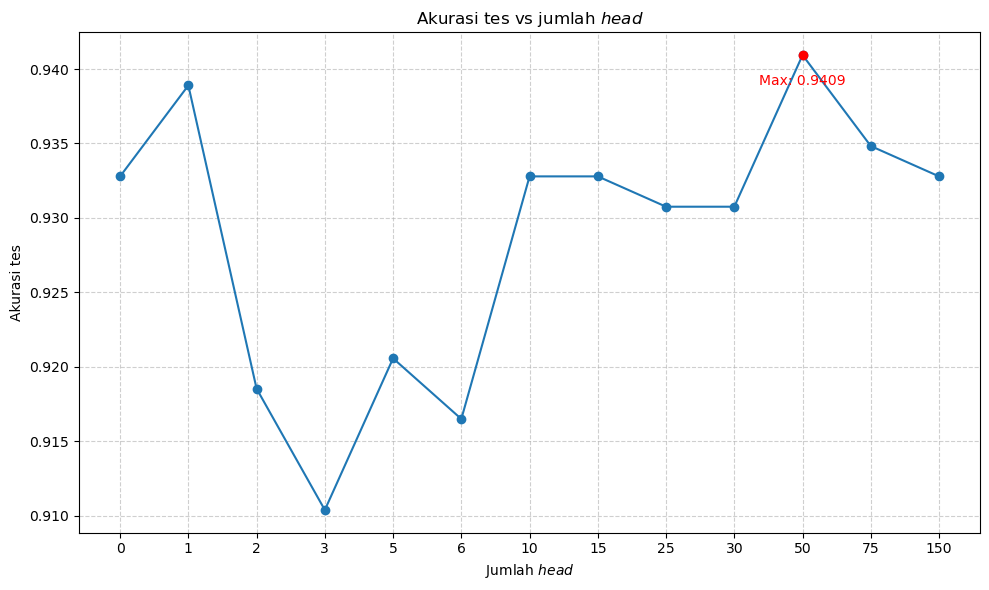

In [8]:
import matplotlib.pyplot as plt

n_head = head_df.sort_values(by='n_heads')

# Convert n_heads to string for categorical spacing
x_labels = n_head['n_heads'].astype(str)
x_positions = range(len(x_labels))  # Even spacing

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_positions, n_head['test_acc'], marker='o', linestyle='-', color='tab:blue')

# Highlight max accuracy
max_idx = n_head['test_acc'].idxmax()
max_x = n_head.index.get_loc(max_idx)
max_y = n_head.loc[max_idx, 'test_acc']

plt.plot(max_x, max_y, 'ro')
plt.text(max_x, max_y - 0.002, f'Max: {max_y:.4f}', ha='center', color='red', fontsize=10)

# Set custom x-axis ticks
plt.xticks(ticks=x_positions, labels=x_labels)

# Labels and title
plt.xlabel('Jumlah $\it{head}$')
plt.ylabel('Akurasi tes')
plt.title('Akurasi tes vs jumlah $\it{head}$')
# plt.xlabel(r"$\it{Number\ of\ Attention\ Heads\ (n\_heads)}$")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from alstm import ALSTMModel
from nltk.corpus import stopwords
import numpy as np
from preprocess import read_dataset, collate_fn, TextClassificationDataset
from text_preprocessor import TextPreprocessor

[nltk_data] Downloading package punkt to /Users/mfshobur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mfshobur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mfshobur/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
import random

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if using multi-GPU

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

g = torch.Generator()
g.manual_seed(42)

def create_new_data(use_stopwords, use_stemming, use_lemma):
    """
    Return train, validation, test loader, and text preprocessor
    """
    train_df = read_dataset('../dataset/trec_train.csv')
    train_df = train_df.dropna()
    test_df = read_dataset('../dataset/trec_test.csv')
    test_df = test_df.dropna()

    # drop all abbreviation
    drop_abbreviation=True
    if drop_abbreviation:
        train_df = train_df[train_df['coarse_label'] != 0]
        train_df['coarse_label'] = train_df['coarse_label'].apply(lambda x: x-1)
        test_df = test_df[test_df['coarse_label'] != 0]
        test_df['coarse_label'] = test_df['coarse_label'].apply(lambda x: x-1)
        label_names = ["ENTY", "DESC", "HUM", "LOC", "NUM"]
    else:
        label_names = ["ABBR", "ENTY", "DESC", "HUM", "LOC", "NUM"]

    train_texts = train_df['text'].values
    test_texts = test_df['text'].values

    train_labels = train_df['coarse_label'].values
    test_labels = test_df['coarse_label'].values

    X_test = test_texts
    y_test = test_labels

    # Further split training data into train and validation
    X_train, X_val, y_train, y_val = train_test_split(
        train_texts, train_labels, test_size=0.2, random_state=42, stratify=train_labels
    )

    # Preprocess text data
    # CONFIG
    stop = set(stopwords.words('english'))
    preprocessor = TextPreprocessor(stopwords=stop, max_vocab_size=10000, max_seq_length=50)
    trec_vocab = preprocessor.get_vocab_from_texts(
        [*X_test, *X_val, *X_train],
        use_stopwords=use_stopwords,
        use_lemmatization=use_lemma,
        use_stemming=use_stemming,
    )

    preprocessor.download_model(filter_from_vocab=trec_vocab, save_embedding=True)
    # preprocessor.fit([*X_train, *X_val, *X_test])
    print(f'Jumlah vocabulary/kosa kata: {preprocessor.vocab_size}')

    # Transform texts to sequences
    X_train_seq = preprocessor.transform(X_train, use_stopwords=use_stopwords, use_stemming=use_stemming, use_lemmatization=use_lemma)
    X_val_seq = preprocessor.transform(X_val, use_stopwords=use_stopwords, use_stemming=use_stemming, use_lemmatization=use_lemma)
    X_test_seq = preprocessor.transform(X_test, use_stopwords=use_stopwords, use_stemming=use_stemming, use_lemmatization=use_lemma)

    labels = len(label_names)
    labels_total = train_df['coarse_label'].value_counts().sort_index().values
    # imbalance dataset
    targets = []
    # targets += [[index] * labels_total[index] for index in range(labels)]
    for i in range(labels):
        targets += [i] * labels_total[i]

    # Create datasets
    train_dataset = TextClassificationDataset(X_train_seq, y_train)
    val_dataset = TextClassificationDataset(X_val_seq, y_val)
    test_dataset = TextClassificationDataset(X_test_seq, y_test)

    batch_size=50
    num_workers=0

    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
        num_workers=num_workers,
        collate_fn=collate_fn,
        generator=g)
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        collate_fn=collate_fn)
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        collate_fn=collate_fn)
    
    return train_loader, val_loader, test_loader, preprocessor

train_loader, val_loader, test_loader, preprocessor = create_new_data(
            use_stopwords=False,
            use_lemma=False,
            use_stemming=False,
)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

label_names = ["ENTY", "DESC", "HUM", "LOC", "NUM"]

Jumlah vocabulary/kosa kata: 8898
Using device: cpu


In [11]:
def show_head_attention(model: ALSTMModel, df: pd.DataFrame, input: str=None, df_row: int=None):
    if input is None:
        if df_row is None:
            row = df.sample(1)
            input = row['text'].values[0]
            label = row['coarse_label'].values[0]
        else:
            row = df.iloc[[df_row]]
            input = row['text'].values[0]
            label = row['coarse_label'].values[0]

    question = preprocessor.transform([input], use_stopwords=False)
    batched = torch.tensor(question)

    with torch.no_grad():
        model.eval()
        output = model(batched, output_attention=True)

    import seaborn as sns

    head = output[0].shape[1]
    predicted = row[f'n_head_{head}'].values[0]

    print(f'Model head: {head}')
    print(f"Index: {row.index.values[0]}")
    print(f'Input text: {input}')
    print(f"Label: {label} - {label_names[label]}")
    print(f"Predicted: {predicted} - {label_names[predicted]}")

    for i in range(head):
        forward = output[0][0][i]
        backward = output[1][0][i]

        plt.figure(figsize=(20,6))
        plt.subplot(1, 2, 1)
        plt.title('Forward')
        sns.heatmap(
            forward.squeeze(0).squeeze(0),
            xticklabels=[preprocessor.index_to_word[idx] for idx in question[0]],
            yticklabels=[preprocessor.index_to_word[idx] for idx in question[0]],
            annot=True,
            fmt=".3f",
        )

        plt.subplot(1, 2, 2)
        plt.title('Backward')
        sns.heatmap(
            backward.squeeze(0).squeeze(0),
            xticklabels=[preprocessor.index_to_word[idx] for idx in question[0]],
            yticklabels=[preprocessor.index_to_word[idx] for idx in question[0]],
            annot=True,
            fmt=".3f",
        )
        plt.suptitle(f'Head: {i+1}')
        plt.show()

In [12]:
def get_model(n_head: str, device) -> ALSTMModel:
    """
    Path format: n_head/num_head
    """
    model_path = f'n_head/{n_head}/model_{n_head}.pt'
    cfg = {
        'drop_rate': 0.5,
        'output': 5,
        'bidirectional': True,
        'vocab_size': preprocessor.vocab_size,
        'context_length': 100,
        'emb_dim': 300,
        'hidden_size': 150,
        'qkv_bias': False,
        'n_heads': n_head,
        'device': device,
        'lstm_layers': 1,
        'use_attention': True if n_head != 0 else False,
    }
    model = ALSTMModel(cfg)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    return model

model_0 = get_model(0, device=device)
model_1 = get_model(1, device=device)
# model_2 = get_model(2, device=device)
model_3 = get_model(3, device=device)
# model_5 = get_model(5, device=device)
# model_6 = get_model(6, device=device)
# model_10 = get_model(10, device=device)
# model_25 = get_model(25, device=device)
# model_30 = get_model(30, device=device)
model_50 = get_model(50, device=device)

In [29]:
def predict_question(question, model, preprocessor: TextPreprocessor, log=False):
    question = preprocessor.transform([question], use_stopwords=False)
    print(f'question: {question}')
    batched = torch.tensor(question)
    with torch.no_grad():
        model.eval()
        logits = model(batched, log=log)
        print(f'logits: {logits}\n')
        # logits
        output = torch.softmax(logits[0], dim=-1)
    return output

def predict_question_batch(questions, model):
    with torch.no_grad():
        model.eval()
        logits = model(questions)
        # logits
        output = torch.softmax(logits, dim=-1)
    return output

def predict_test_loader(model: ALSTMModel, test_loader: DataLoader) -> np.ndarray:
    idx = np.zeros(491)
    current_idx = 0
    for i, (feature, label) in enumerate(test_loader):
        predicted = predict_question_batch(feature, model)
        max = predicted.argmax(dim=-1)
        idx[current_idx:current_idx+len(predicted)] = [*max]
        current_idx += len(predicted)
    return idx.astype(np.int32)

In [14]:
df = pd.read_csv('../dataset/trec_test.csv')
df = df[df['coarse_label'] != 0].drop('fine_label', axis=1).reset_index(drop=True)
df['coarse_label'] = df['coarse_label'].apply(lambda x: x-1)
df['n_head_0'] = predict_test_loader(model_0, test_loader)
df['n_head_1'] = predict_test_loader(model_1, test_loader)
# df['n_head_2'] = predict_test_loader(model_2, test_loader)
df['n_head_3'] = predict_test_loader(model_3, test_loader)
# df['n_head_5'] = predict_test_loader(model_5, test_loader)
# df['n_head_10'] = predict_test_loader(model_10, test_loader)
# df['n_head_25'] = predict_test_loader(model_25, test_loader)
# df['n_head_30'] = predict_test_loader(model_30, test_loader)
df['n_head_50'] = predict_test_loader(model_50, test_loader)

In [15]:
# only head 50 get it right
df[(df['n_head_1'] != df['coarse_label']) & (df['n_head_3'] != df['coarse_label']) & (df['n_head_50'] == df['coarse_label'])]

# only head 50 get it wrong
# df[(df['n_head_1'] == df['coarse_label']) & (df['n_head_3'] == df['coarse_label']) & (df['n_head_50'] != df['coarse_label'])]

text  coarse_label  \
223  What is the electrical output in Madrid , Spain ?             0   
249    What is the criterion for being legally blind ?             0   
256              What is the depth of the Nile river ?             4   
289                   What is foot and mouth disease ?             0   
479                What is the source of natural gas ?             0   

     n_head_0  n_head_1  n_head_3  n_head_50  
223         4         4         4          0  
249         1         1         1          0  
256         4         3         3          4  
289         1         1         1          0  
479         0         1         1          0

In [16]:
# df.to_csv('trec_test_n_heads.csv')

In [17]:
print((df['n_head_0'] == df['coarse_label']).sum()/491)
print((df['n_head_1'] == df['coarse_label']).sum()/491)
# print((df['n_head_2'] == df['coarse_label']).sum()/491)
print((df['n_head_3'] == df['coarse_label']).sum()/491)
# print((df['n_head_5'] == df['coarse_label']).sum()/491)
# print((df['n_head_10'] == df['coarse_label']).sum()/491)
# print((df['n_head_25'] == df['coarse_label']).sum()/491)
# print((df['n_head_30'] == df['coarse_label']).sum()/491)
print((df['n_head_50'] == df['coarse_label']).sum()/491)

0.9327902240325866
0.9389002036659878
0.9103869653767821
0.9409368635437881


In [18]:
df_row = 256
# df_row = 59

# Contoh visualisasi data

In [27]:
[preprocessor.index_to_word[id] for id in [3, 4, 2, 3744, 1, 2, 1680, 101]]

['what', 'is', 'the', 'depth', '<UNK>', 'the', 'nile', 'river']

In [30]:
predict_question('What is the depth of the Nile river ?', model=model_50, log=True, preprocessor=preprocessor)

question: [[3, 4, 2, 3744, 1, 2, 1680, 101]]
embedding shape: torch.Size([1, 8, 300])
embedding: tensor([[[ 0.1396, -0.0062,  0.2148,  ...,  0.0571,  0.0996, -0.2344],
         [ 0.0070, -0.0732,  0.1719,  ...,  0.0112,  0.1641,  0.1069],
         [ 0.0801,  0.1050,  0.0498,  ...,  0.0037,  0.0476, -0.0688],
         ...,
         [ 0.0801,  0.1050,  0.0498,  ...,  0.0037,  0.0476, -0.0688],
         [-0.1172,  0.2051,  0.0245,  ..., -0.1387, -0.0049,  0.1196],
         [ 0.0084,  0.1816,  0.0898,  ..., -0.2559,  0.3945, -0.0586]]])

after dropout shape: torch.Size([1, 8, 300])
after dropout: tensor([[[ 0.1396, -0.0062,  0.2148,  ...,  0.0571,  0.0996, -0.2344],
         [ 0.0070, -0.0732,  0.1719,  ...,  0.0112,  0.1641,  0.1069],
         [ 0.0801,  0.1050,  0.0498,  ...,  0.0037,  0.0476, -0.0688],
         ...,
         [ 0.0801,  0.1050,  0.0498,  ...,  0.0037,  0.0476, -0.0688],
         [-0.1172,  0.2051,  0.0245,  ..., -0.1387, -0.0049,  0.1196],
         [ 0.0084,  0.1816,  0.

tensor([0.2174, 0.1431, 0.0078, 0.0177, 0.6140])

# 0 Head

# 1 Head

Model head: 1
Index: 256
Input text: What is the depth of the Nile river ?
Label: 4 - NUM
Predicted: 3 - LOC


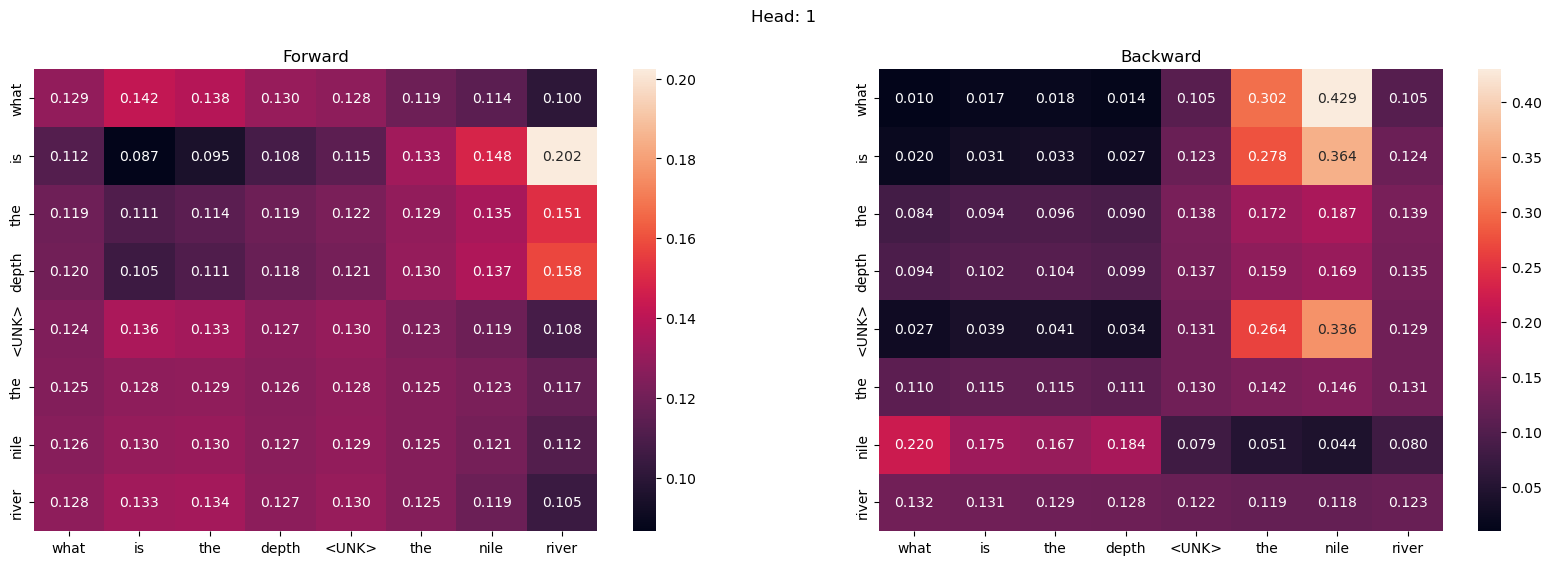

In [19]:
show_head_attention(model_1, df, df_row=df_row)

# 3 Head

Model head: 3
Index: 256
Input text: What is the depth of the Nile river ?
Label: 4 - NUM
Predicted: 3 - LOC


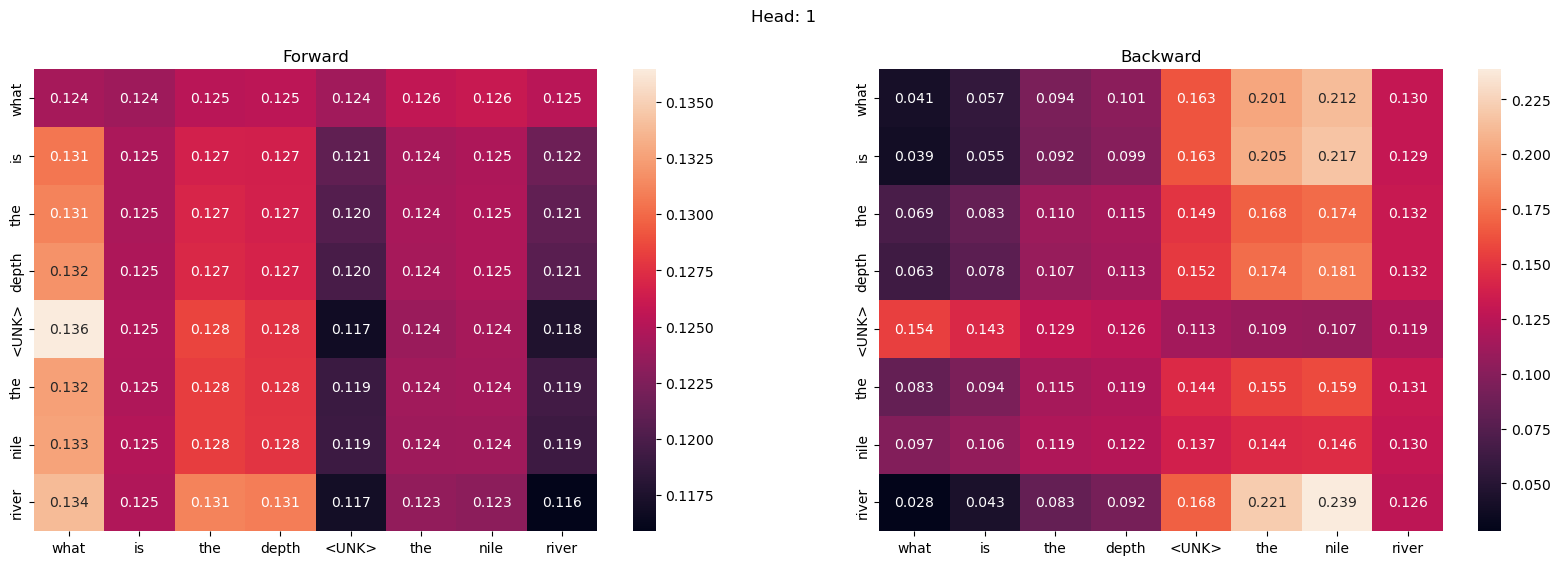

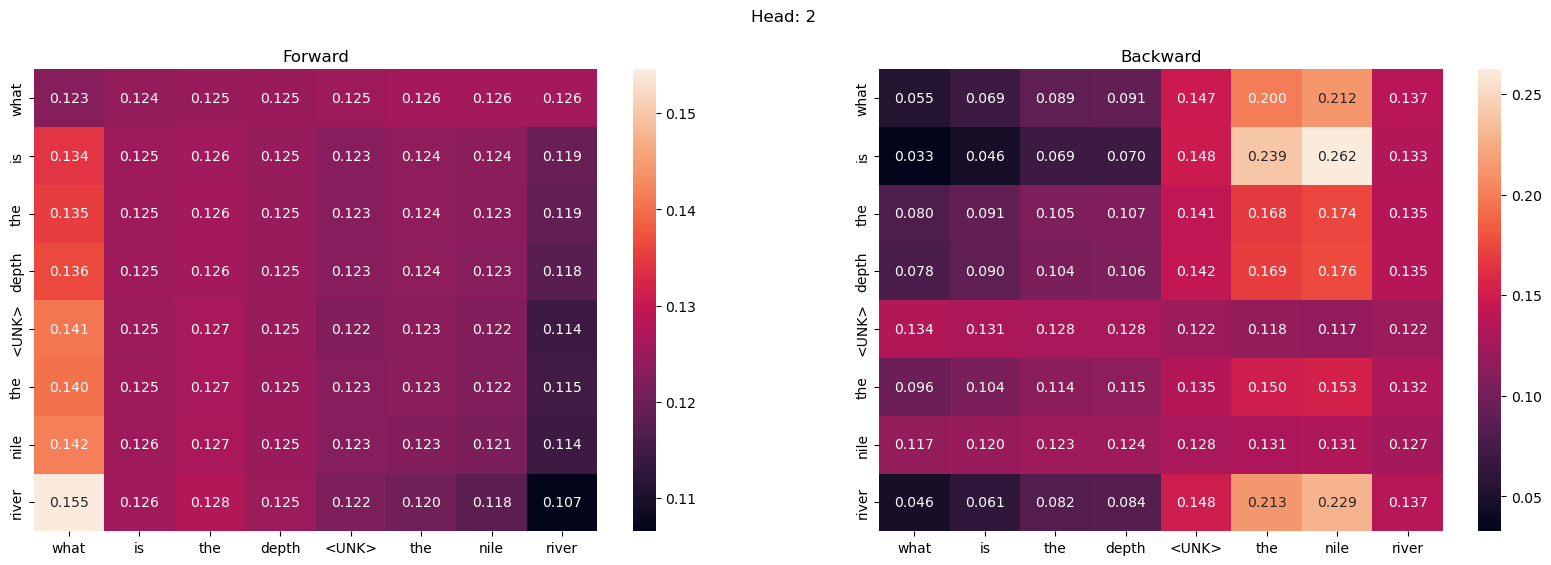

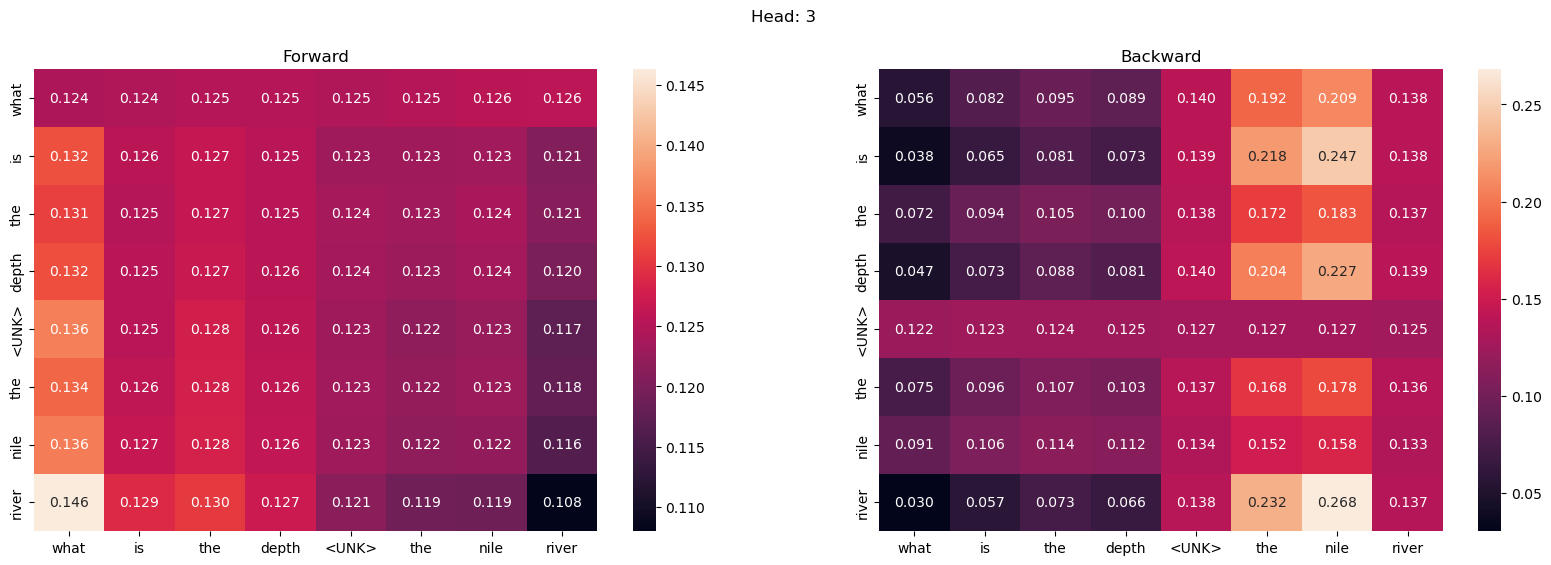

In [20]:
show_head_attention(model_3, df, df_row=df_row)

# 50 Head

Model head: 50
Index: 256
Input text: What is the depth of the Nile river ?
Label: 4 - NUM
Predicted: 4 - NUM


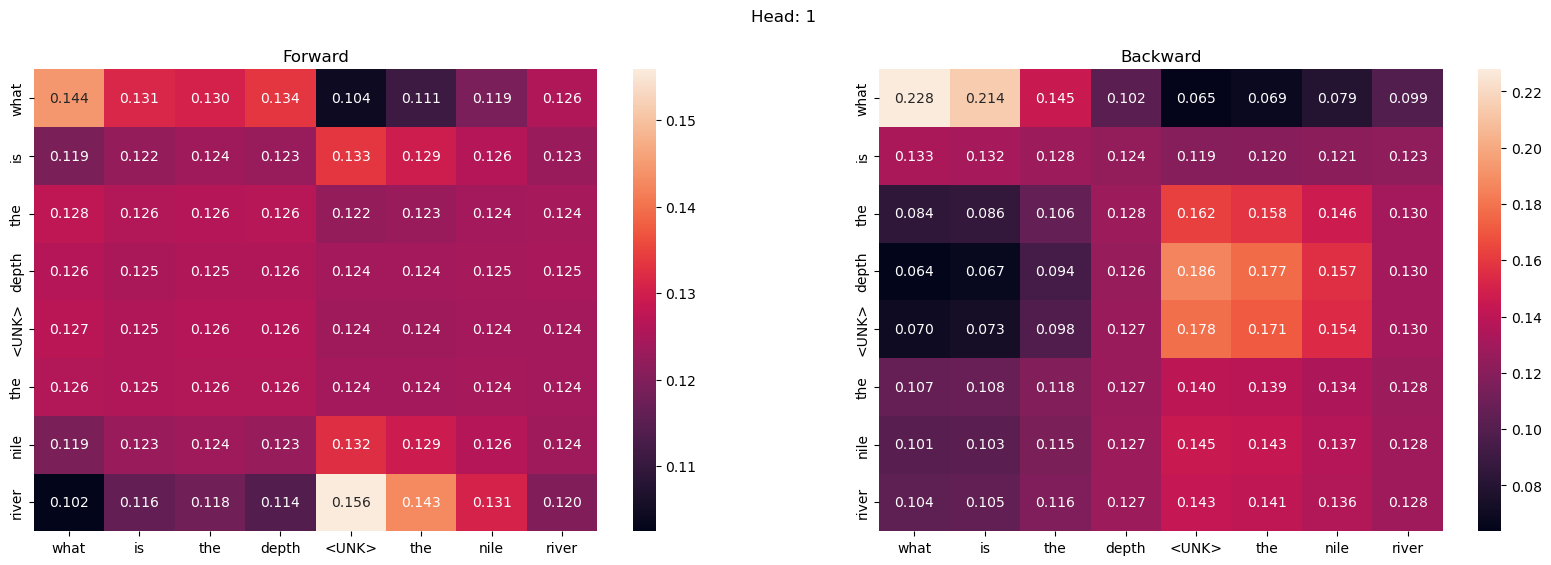

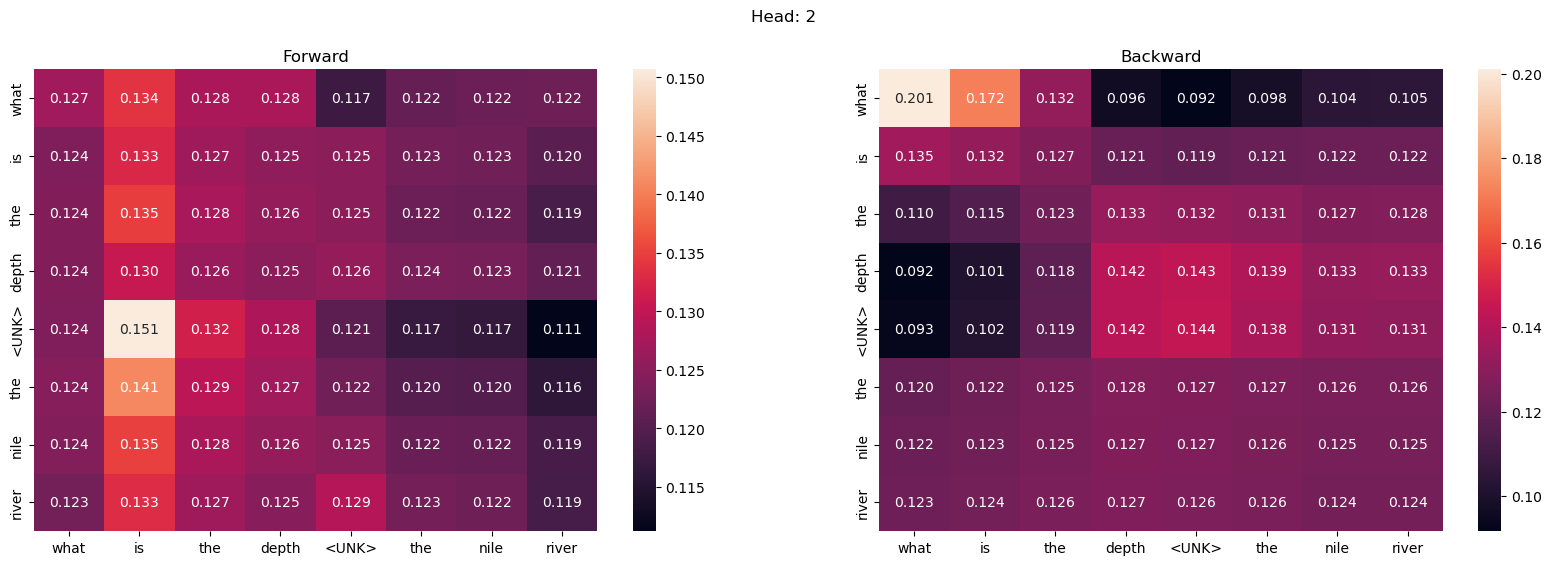

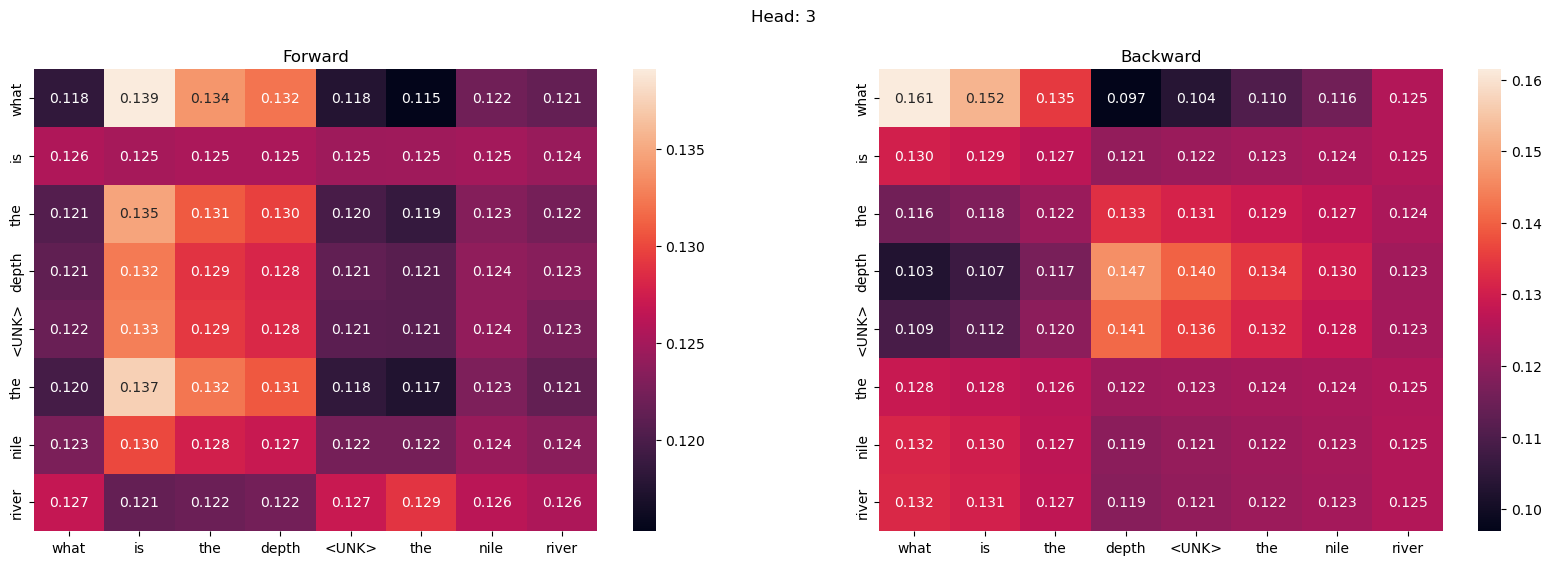

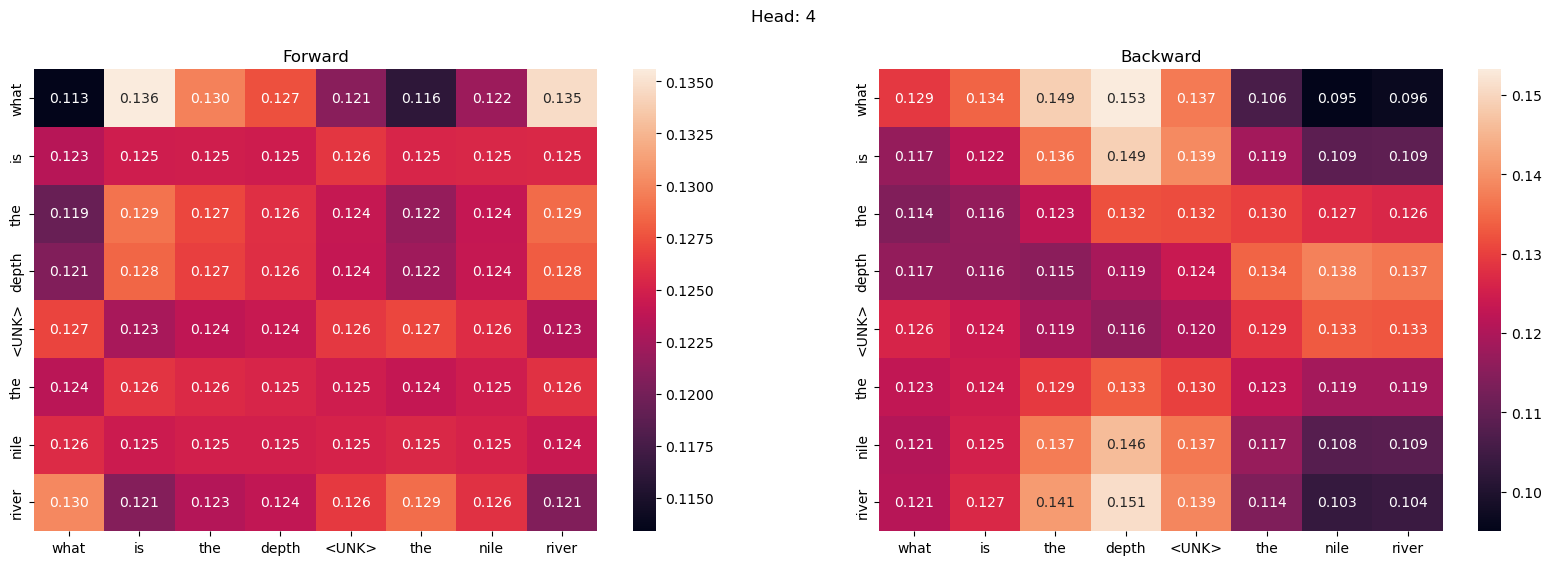

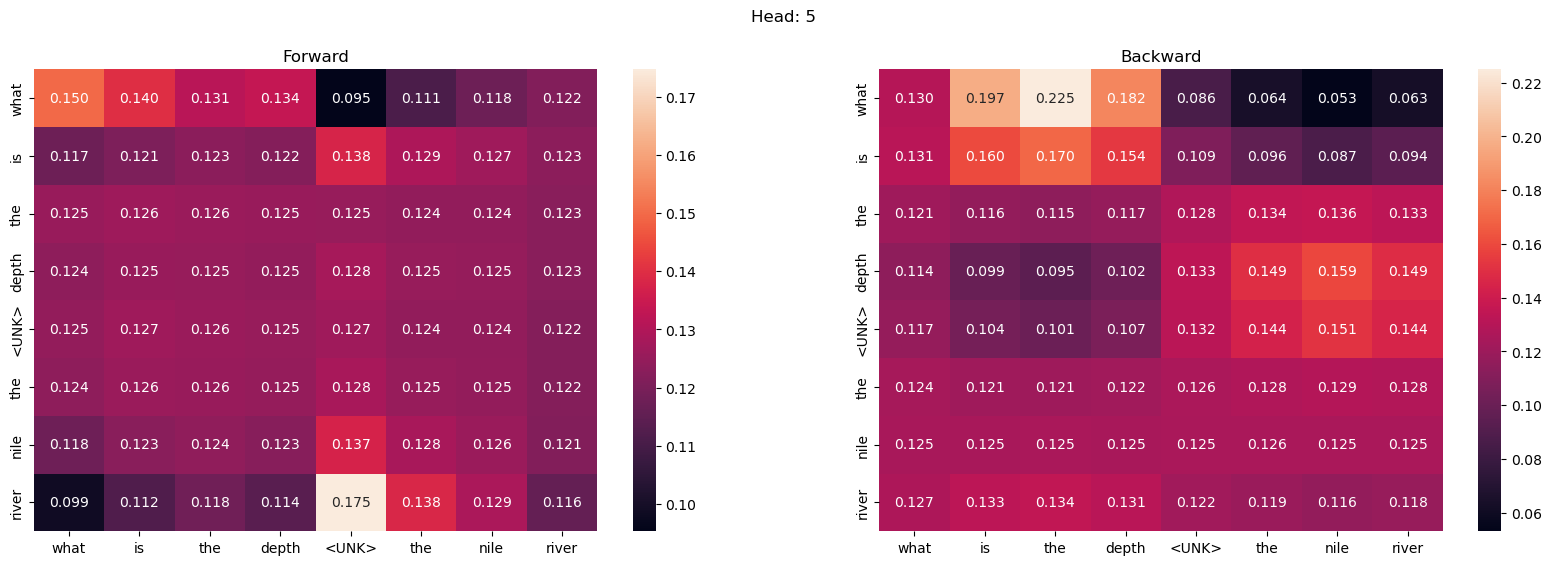

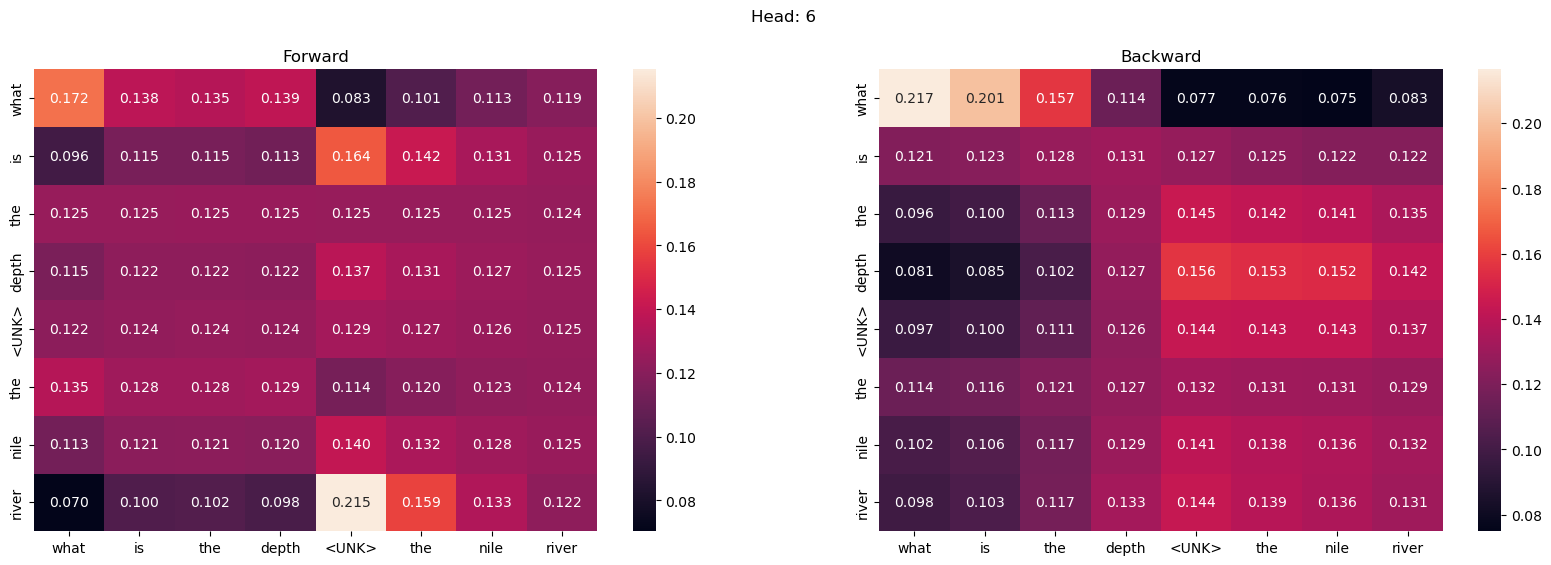

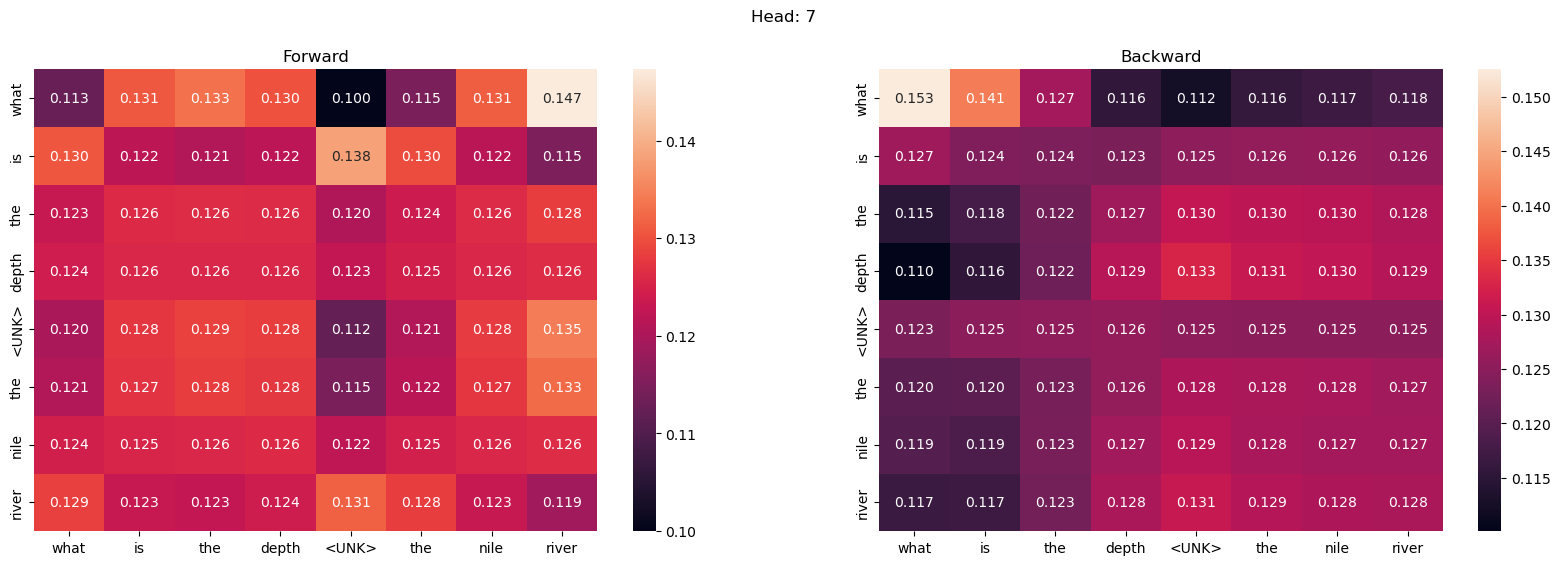

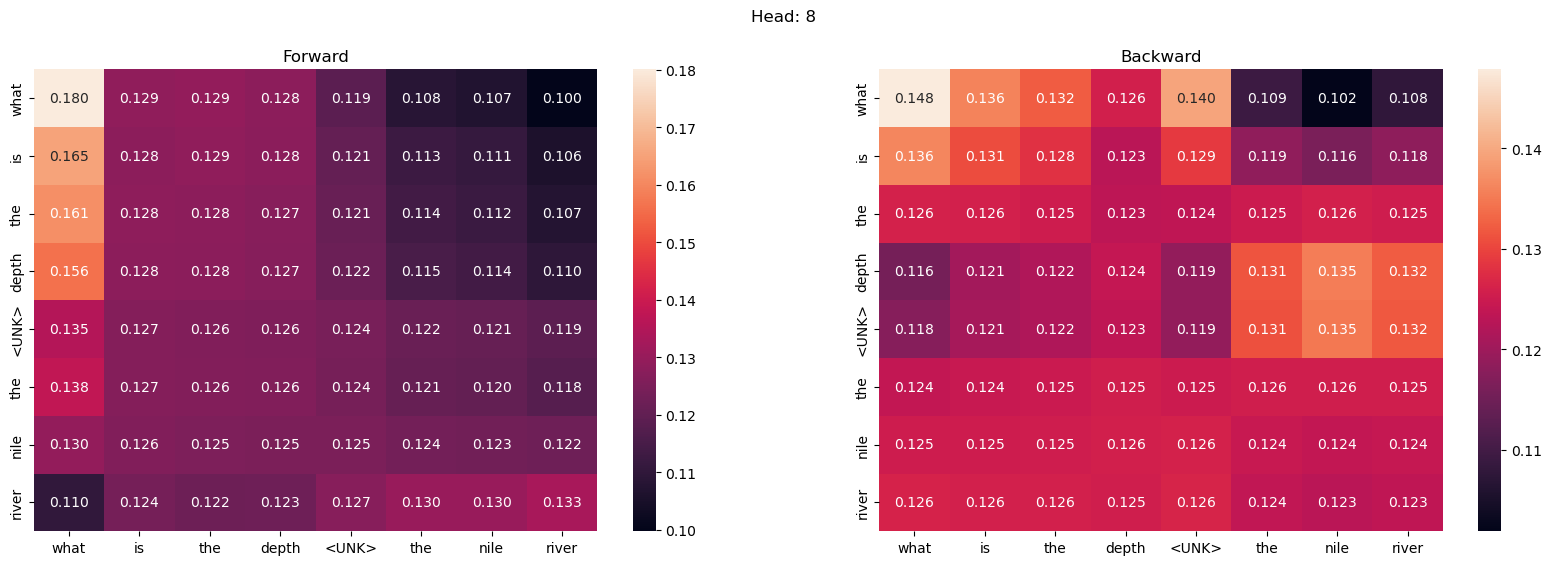

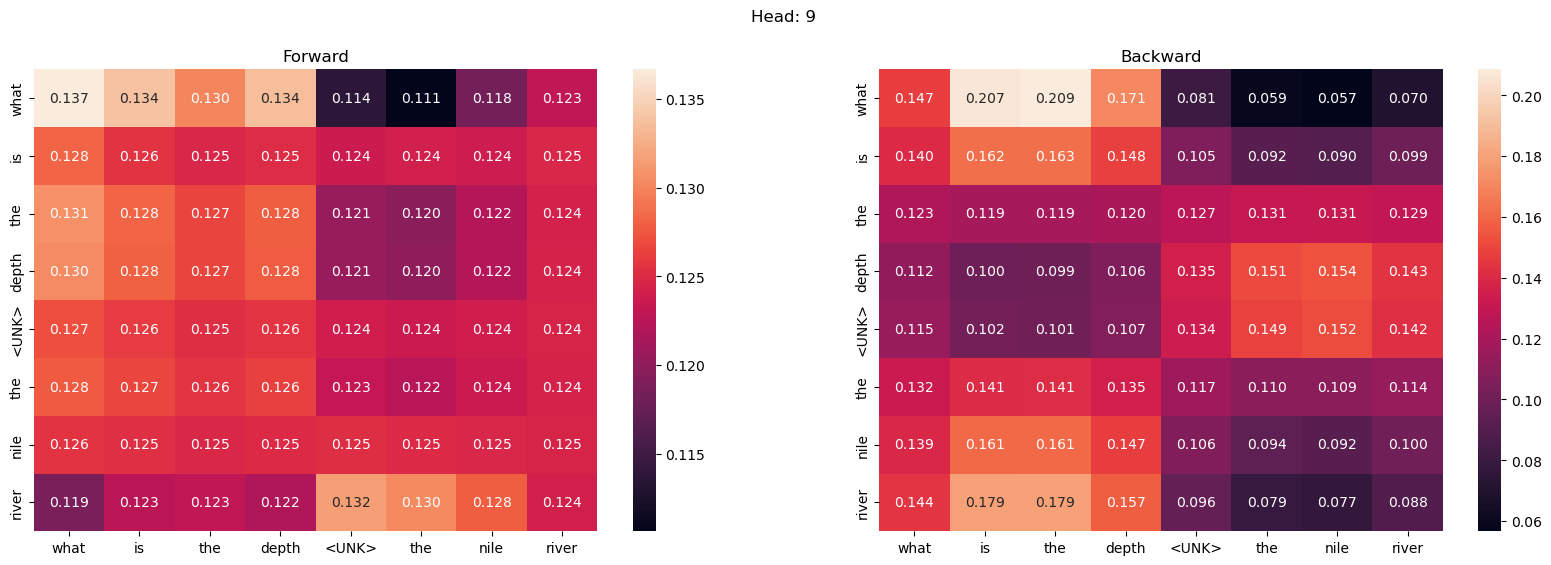

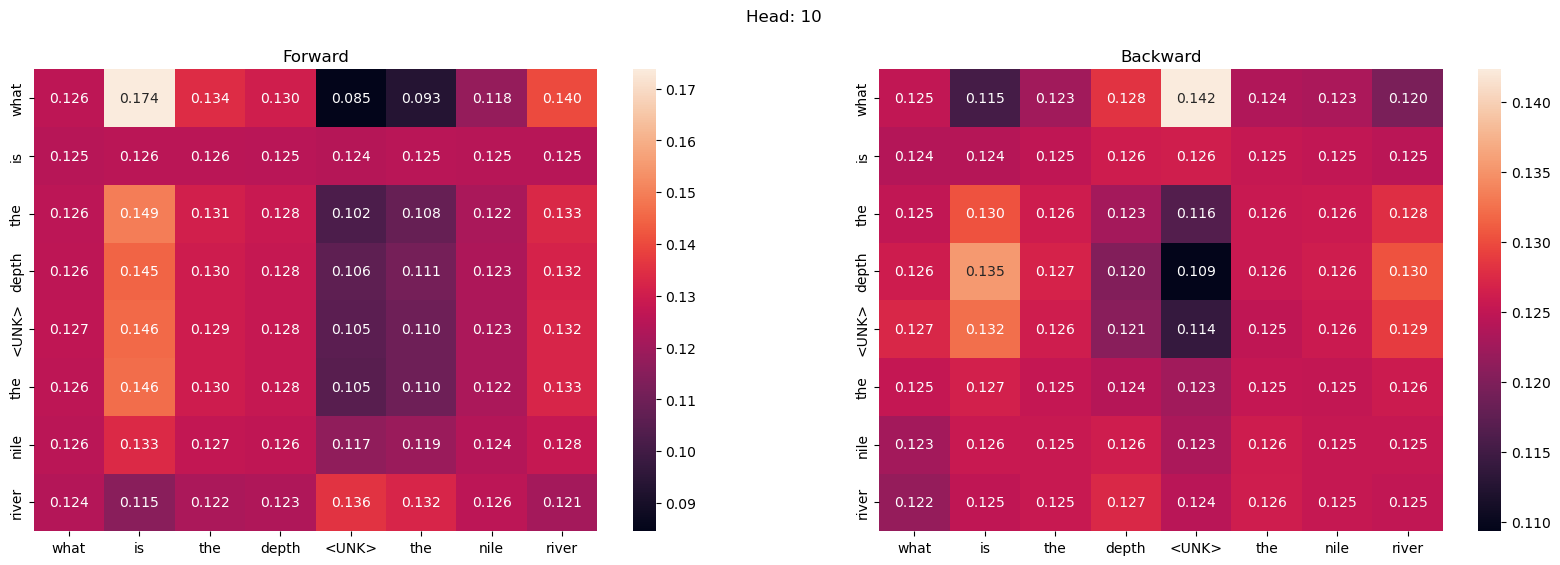

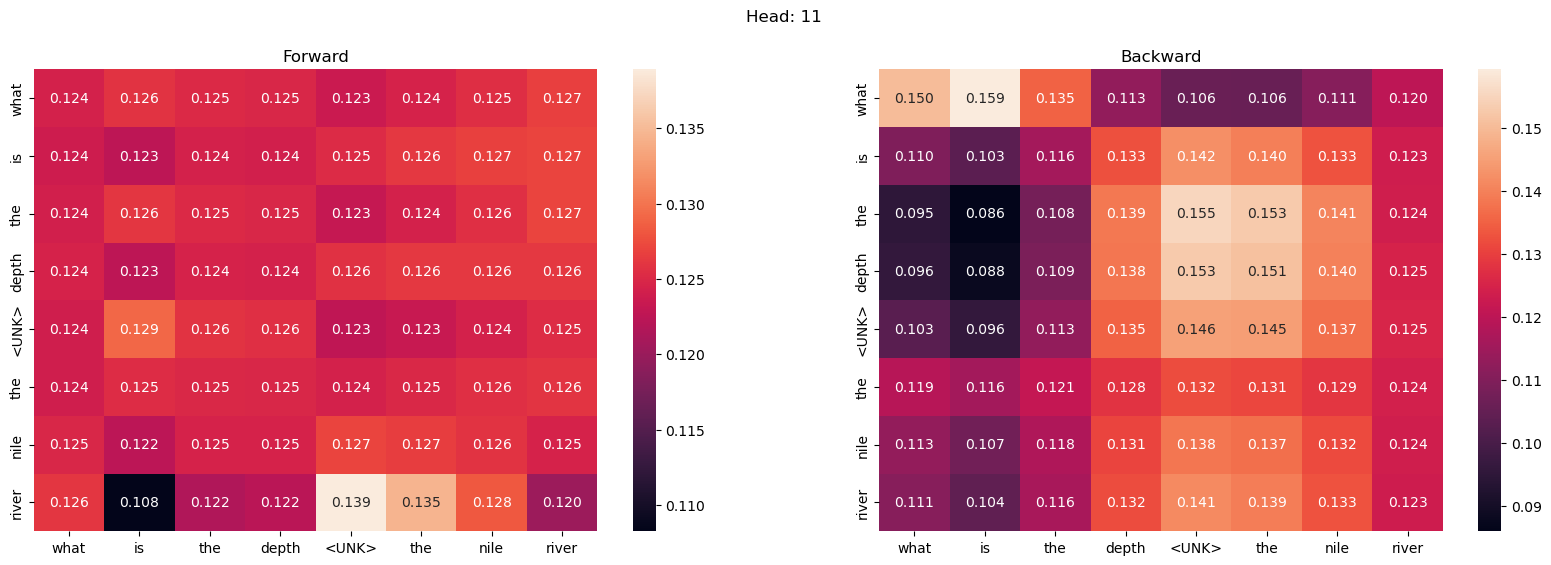

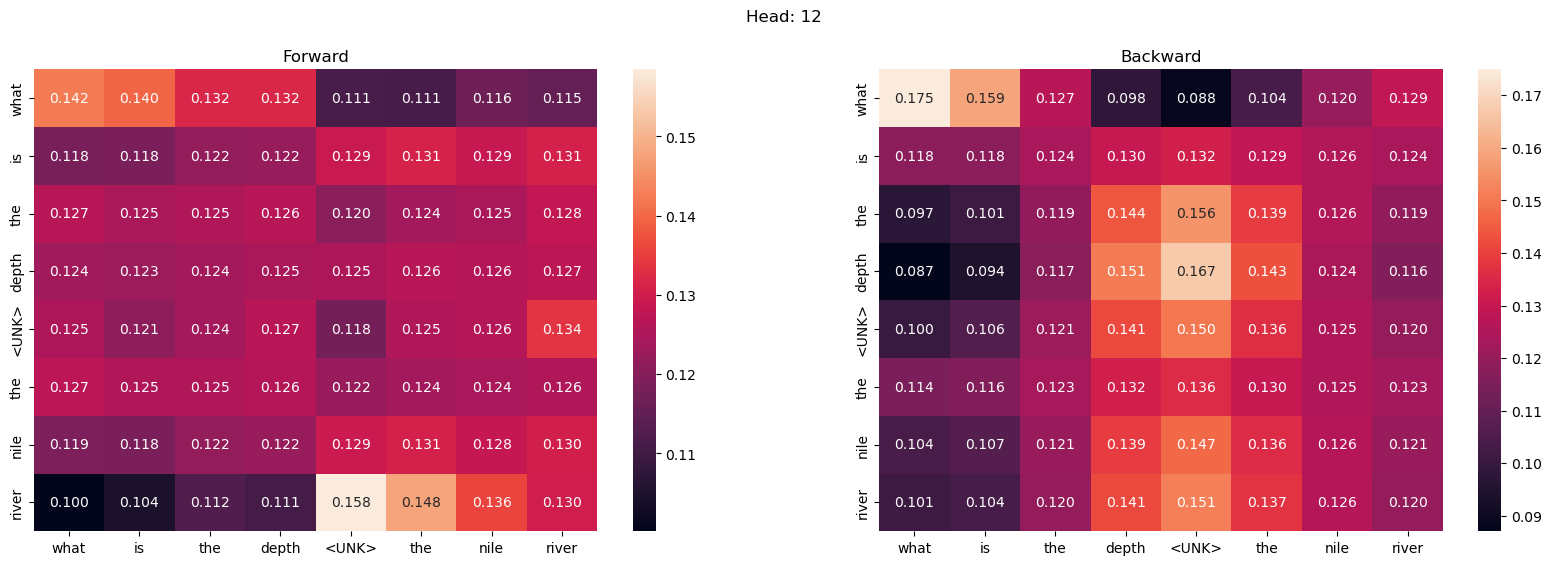

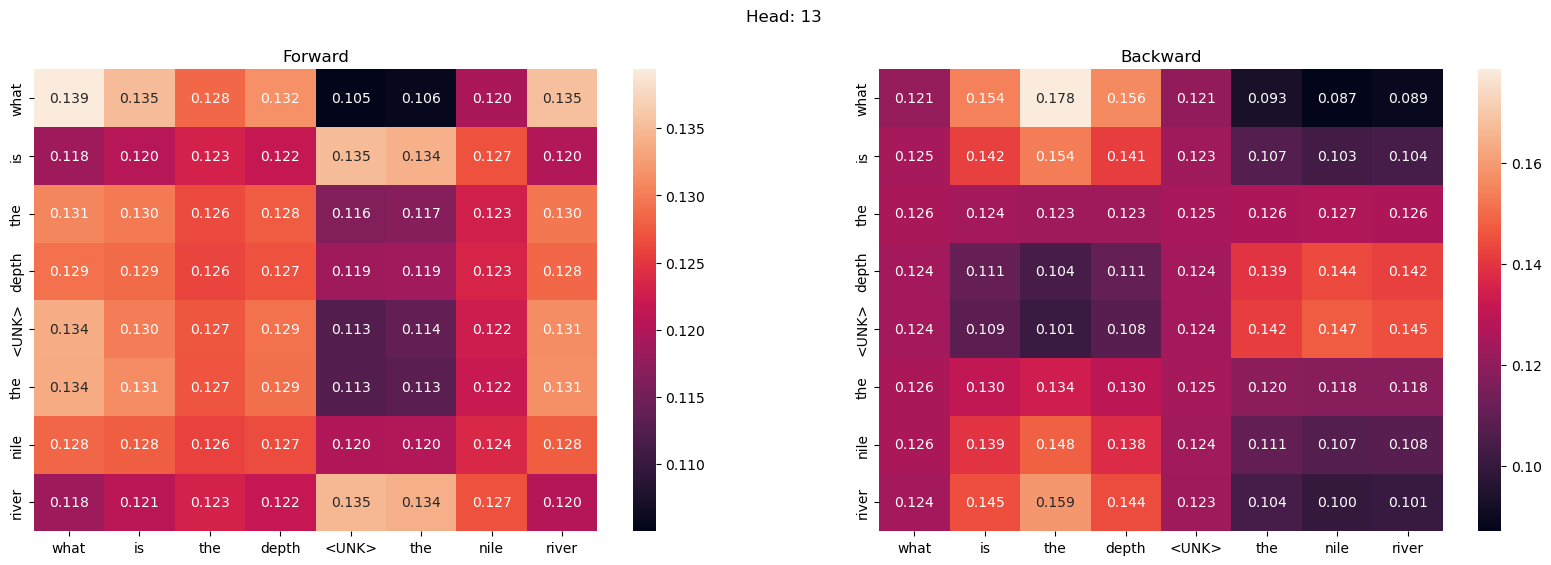

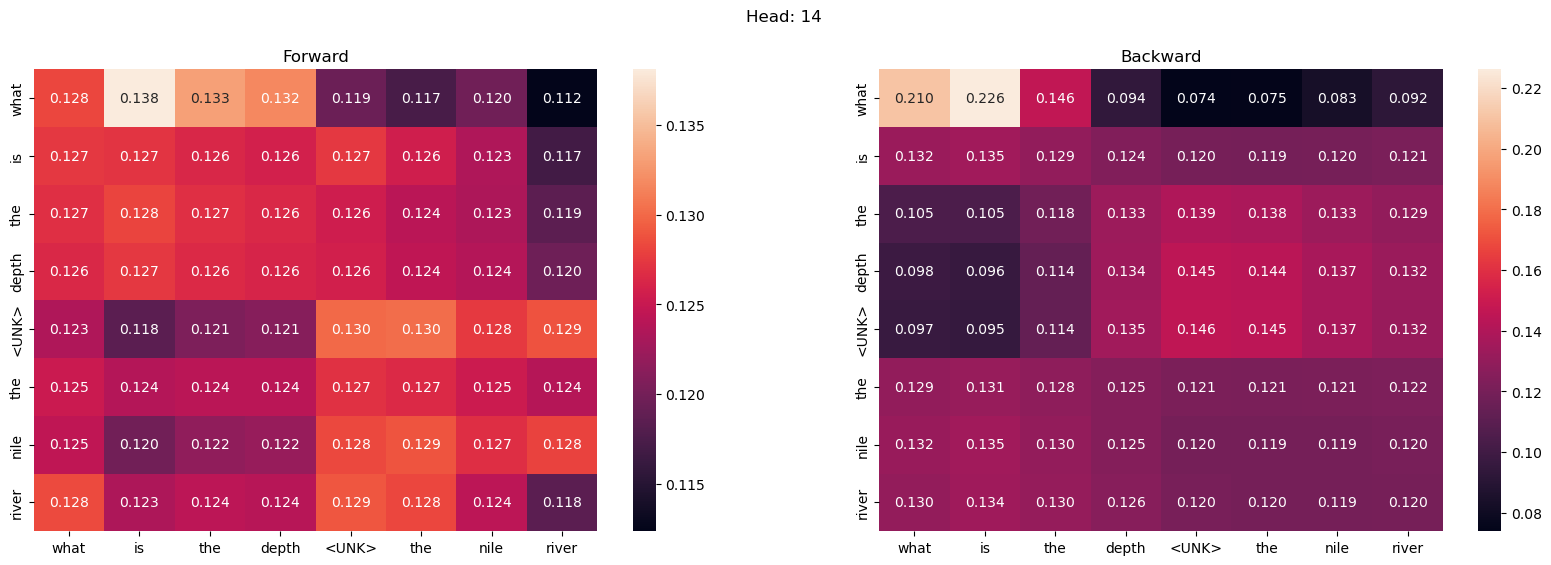

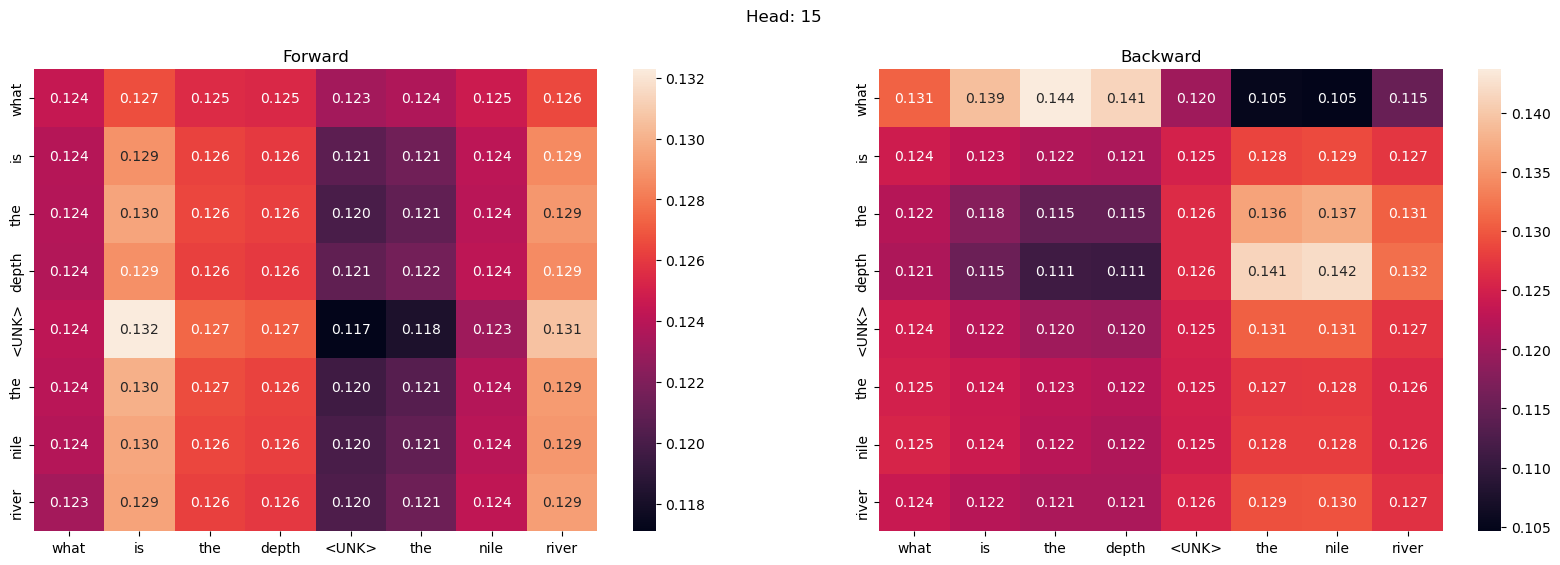

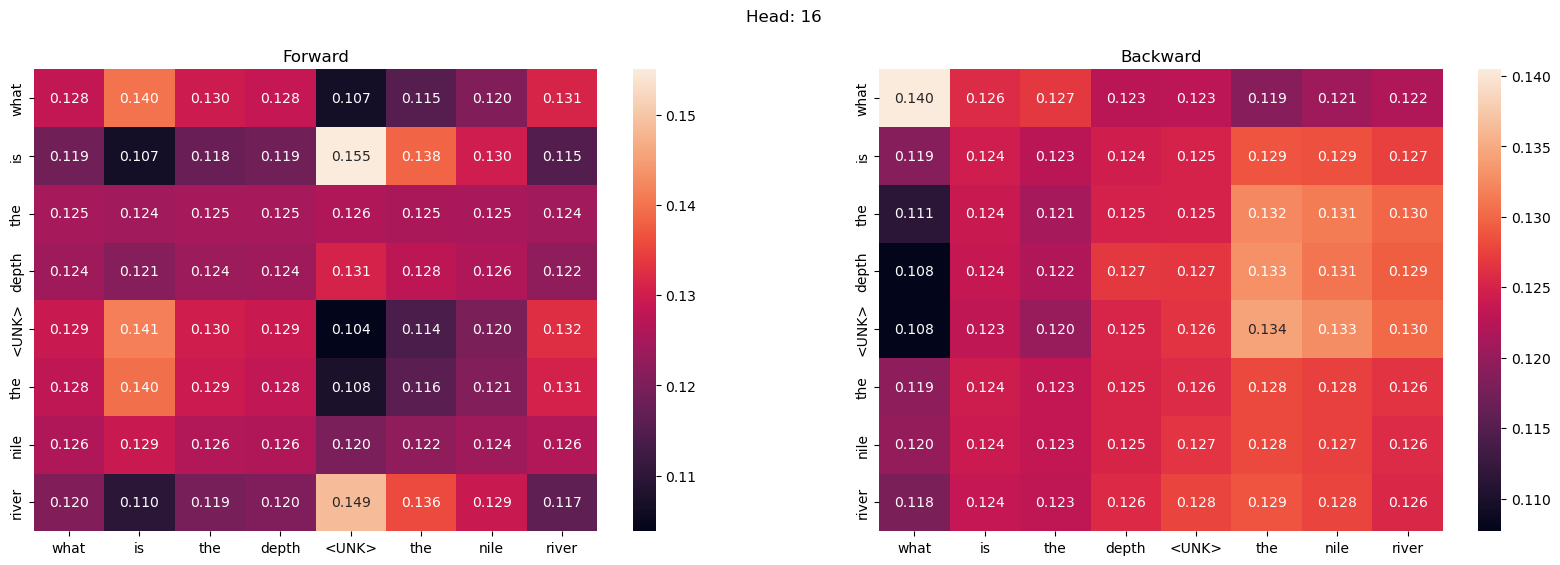

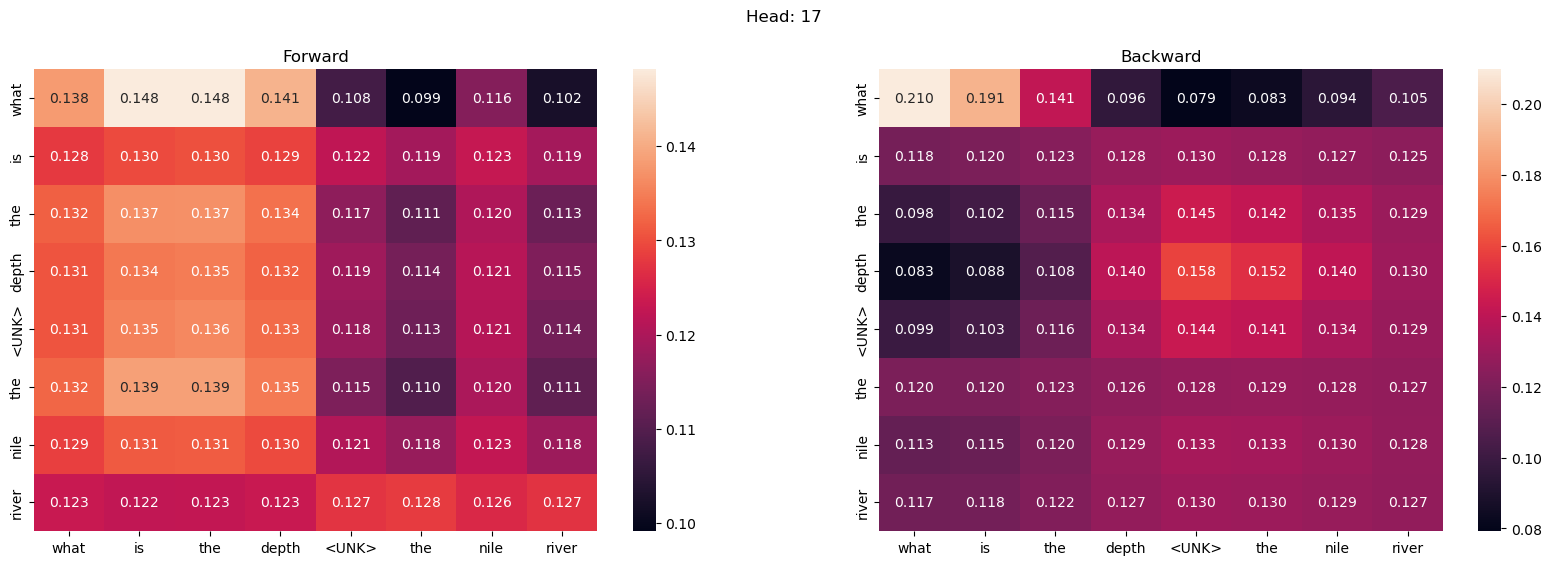

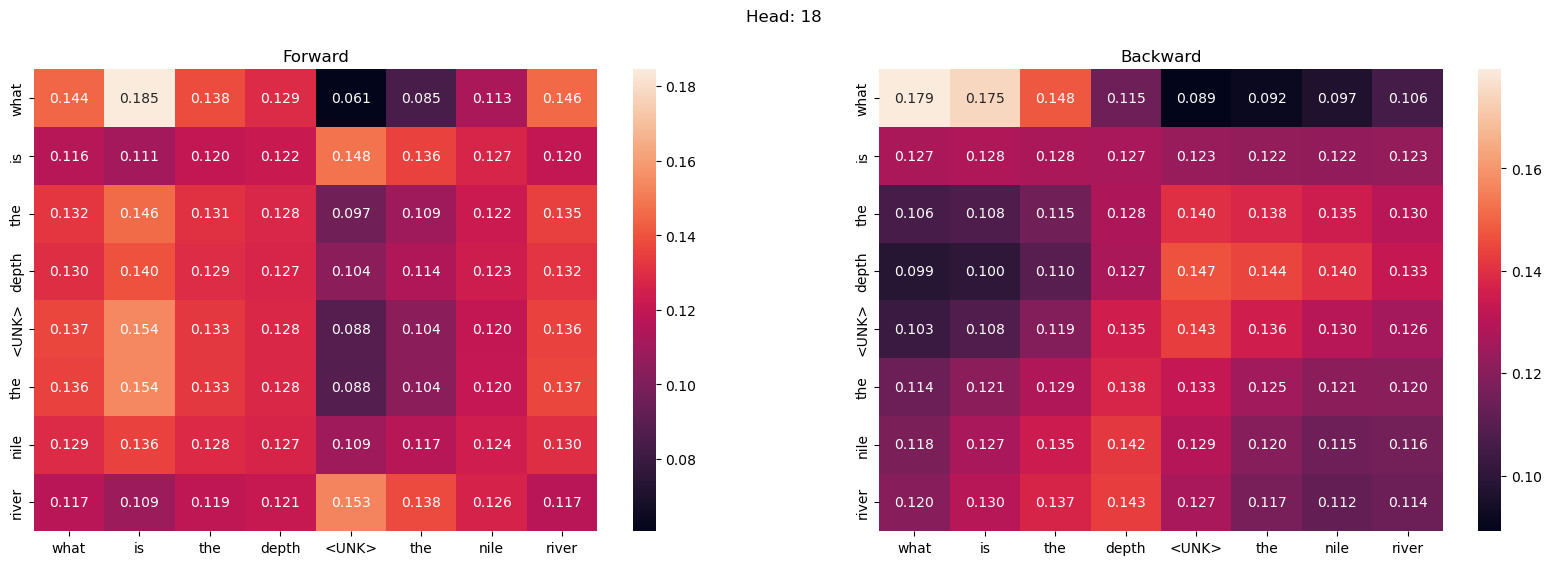

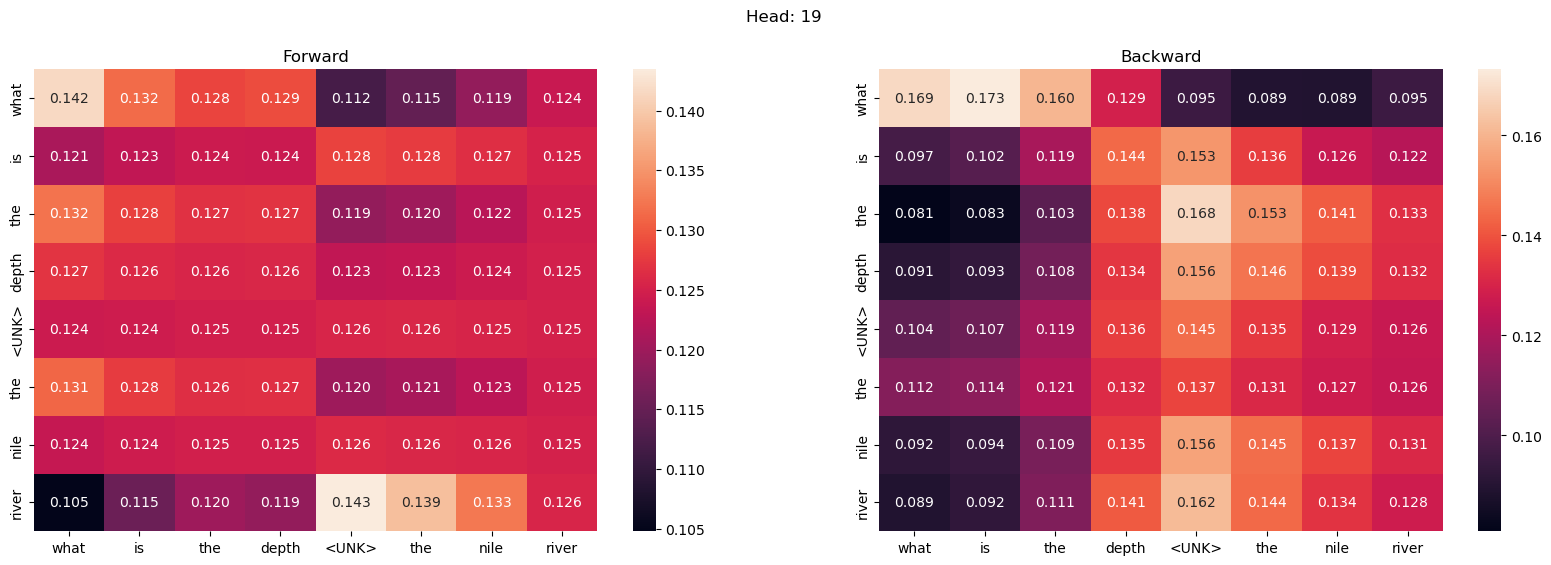

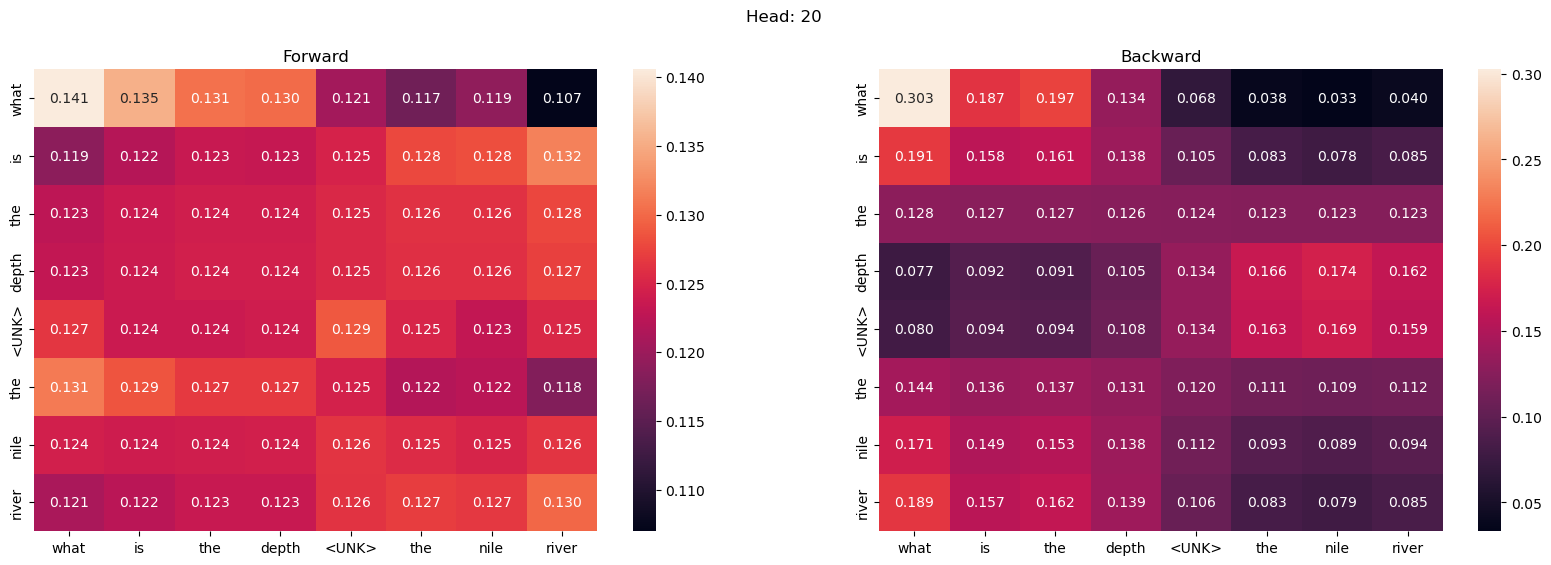

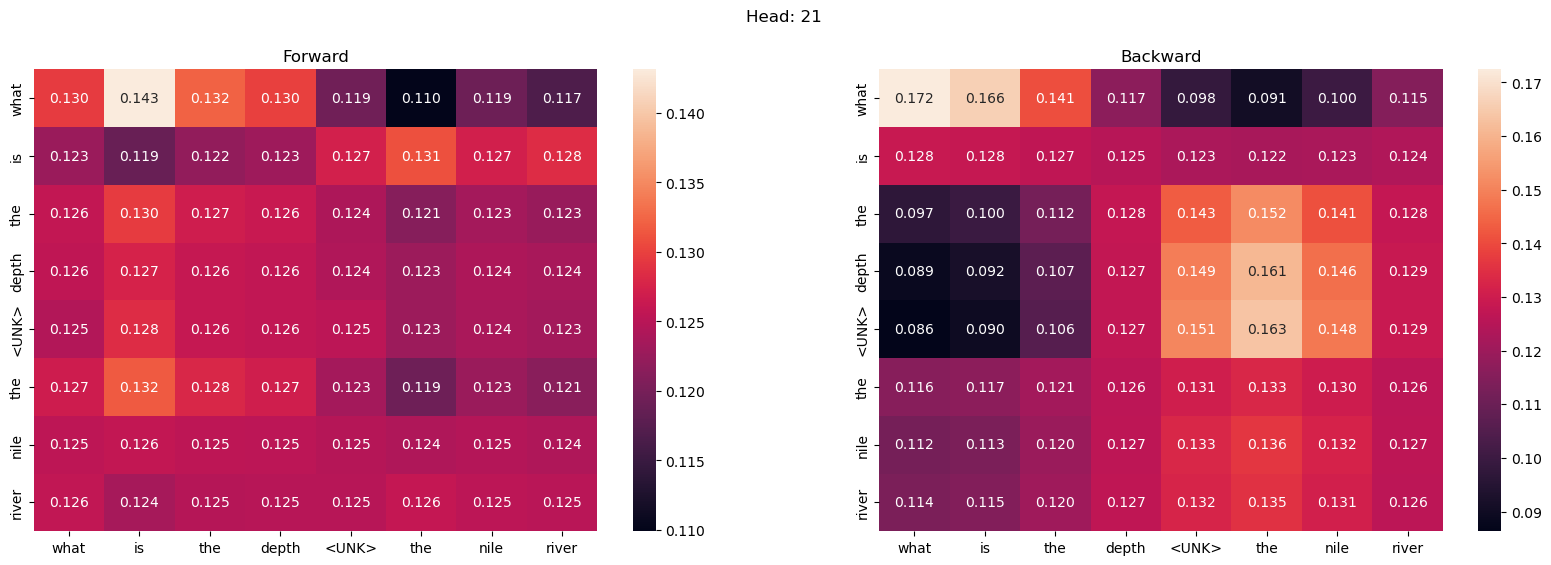

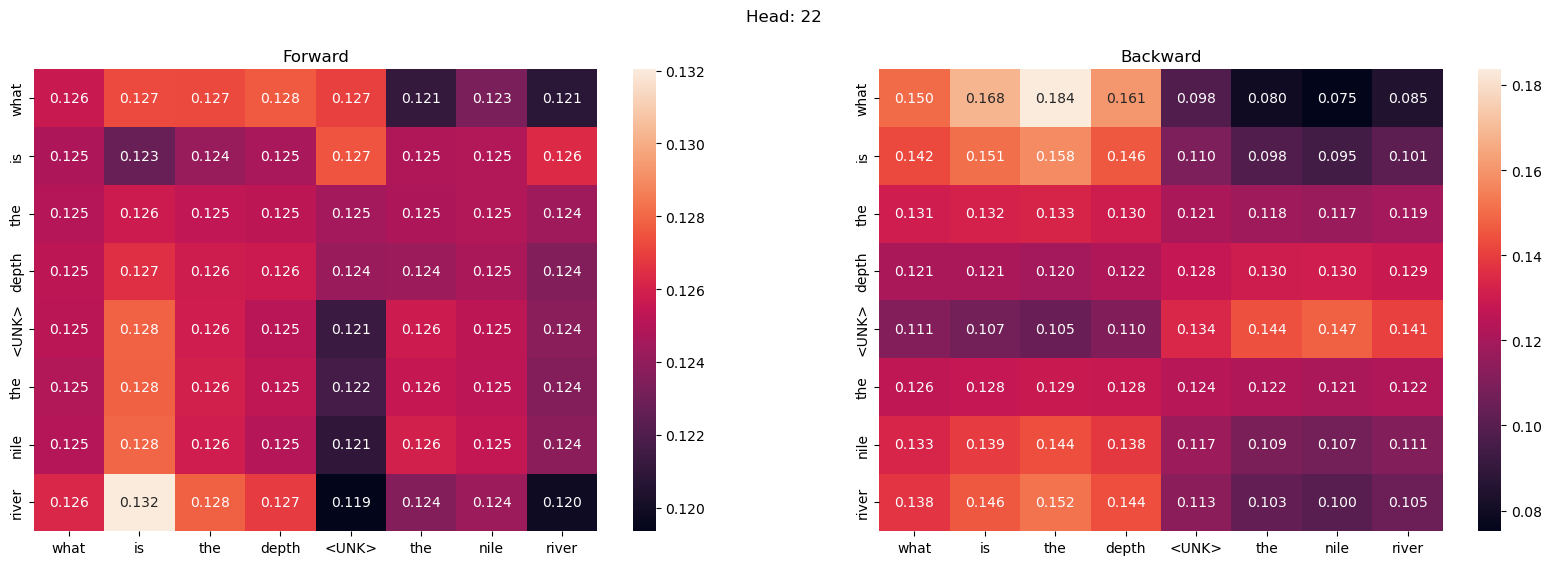

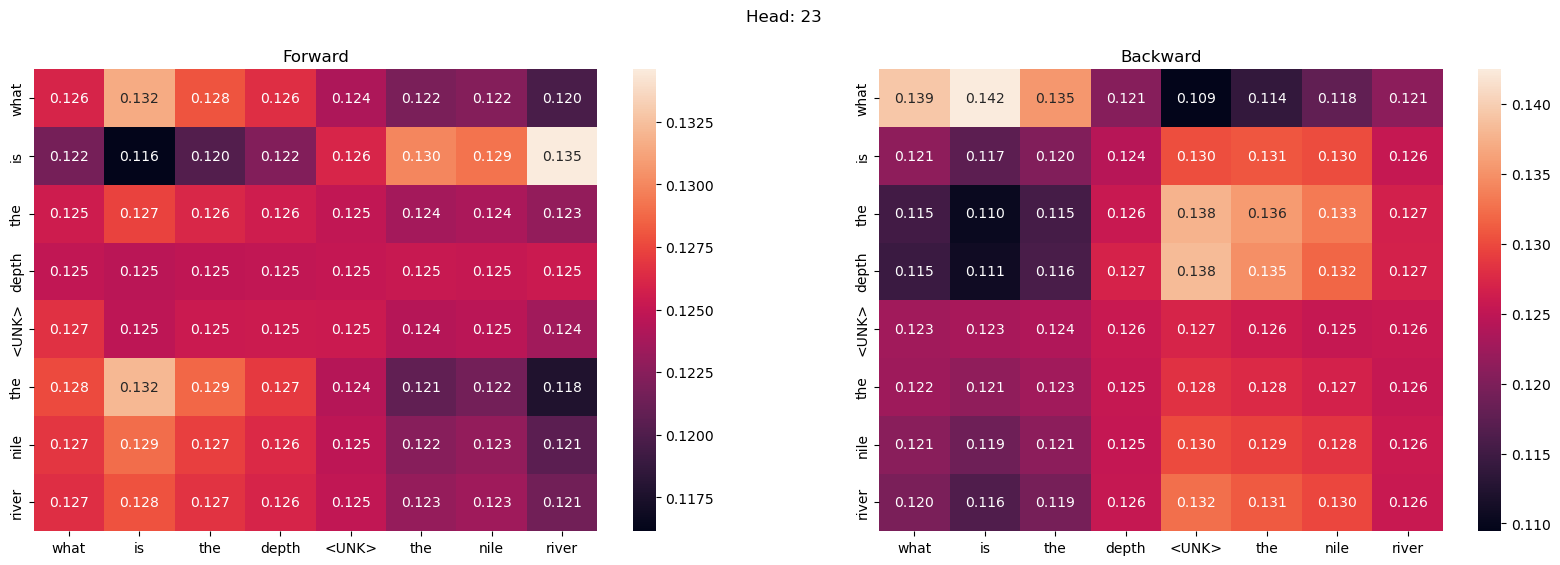

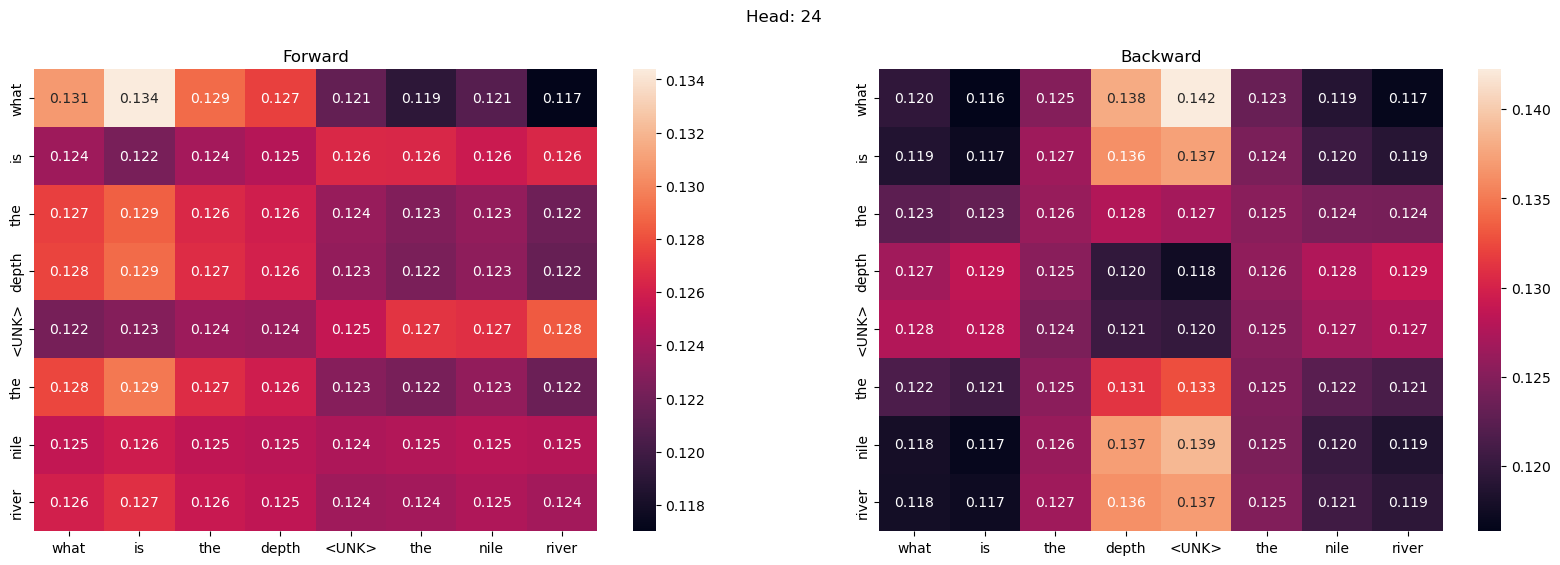

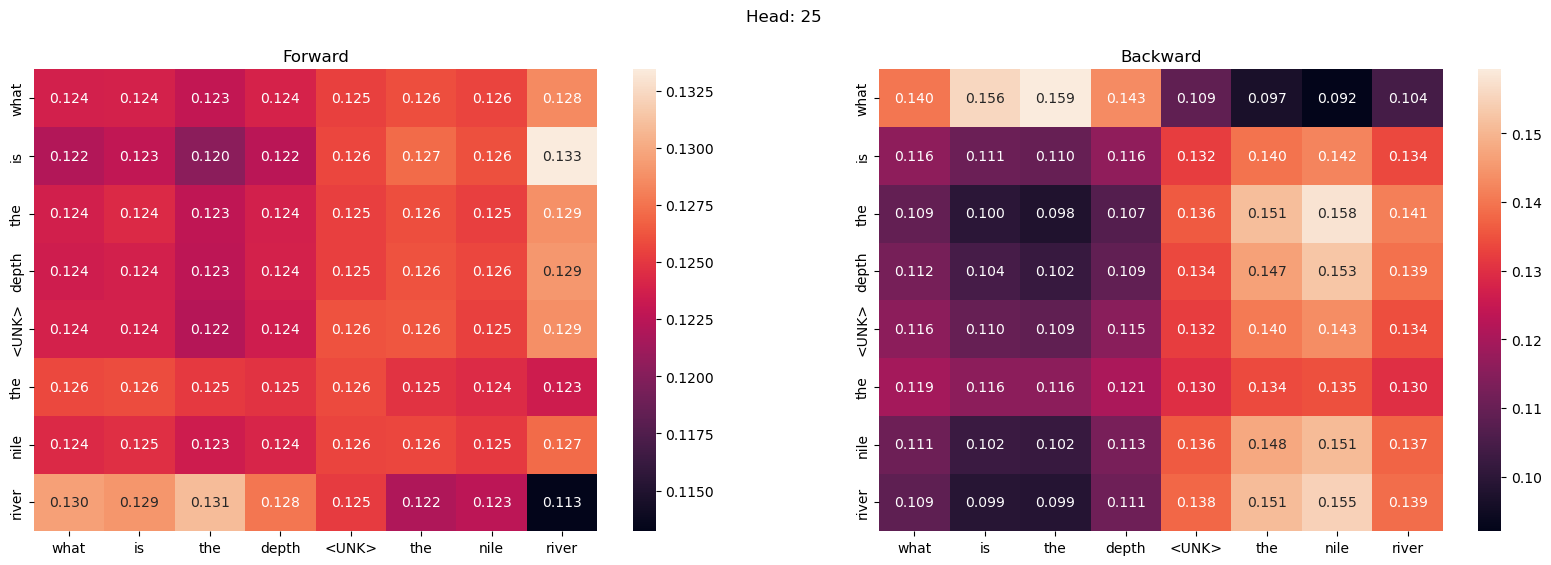

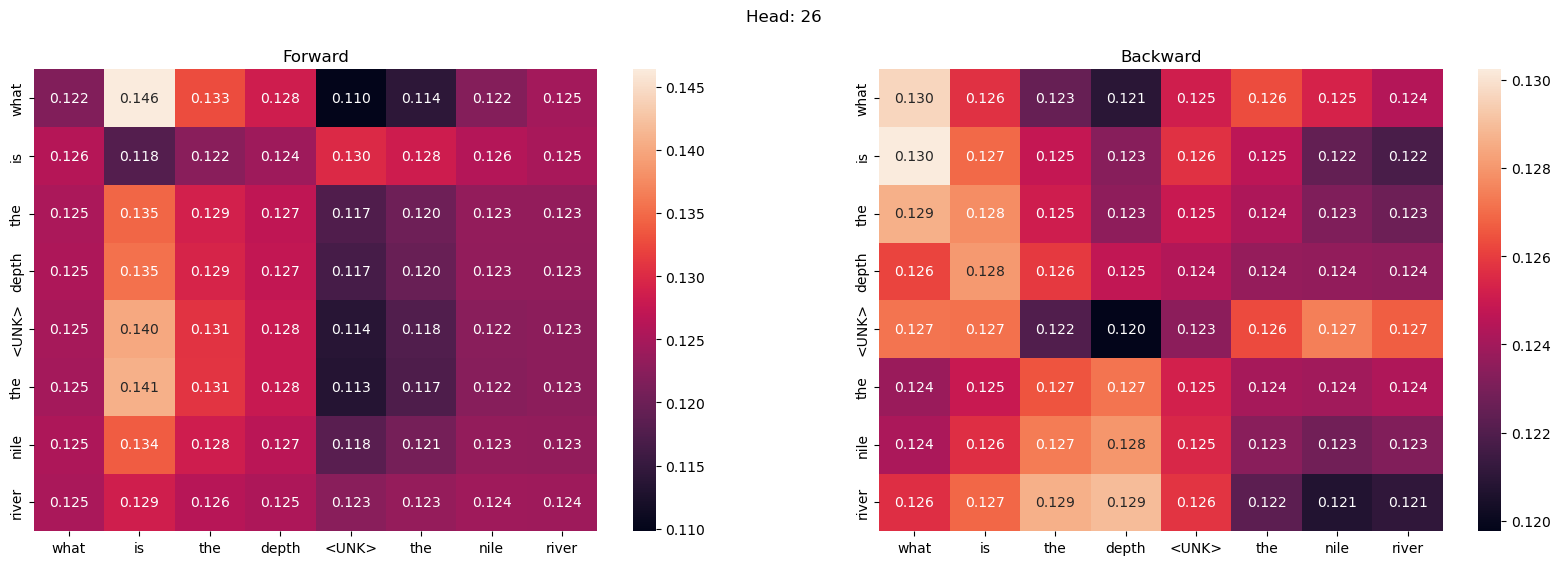

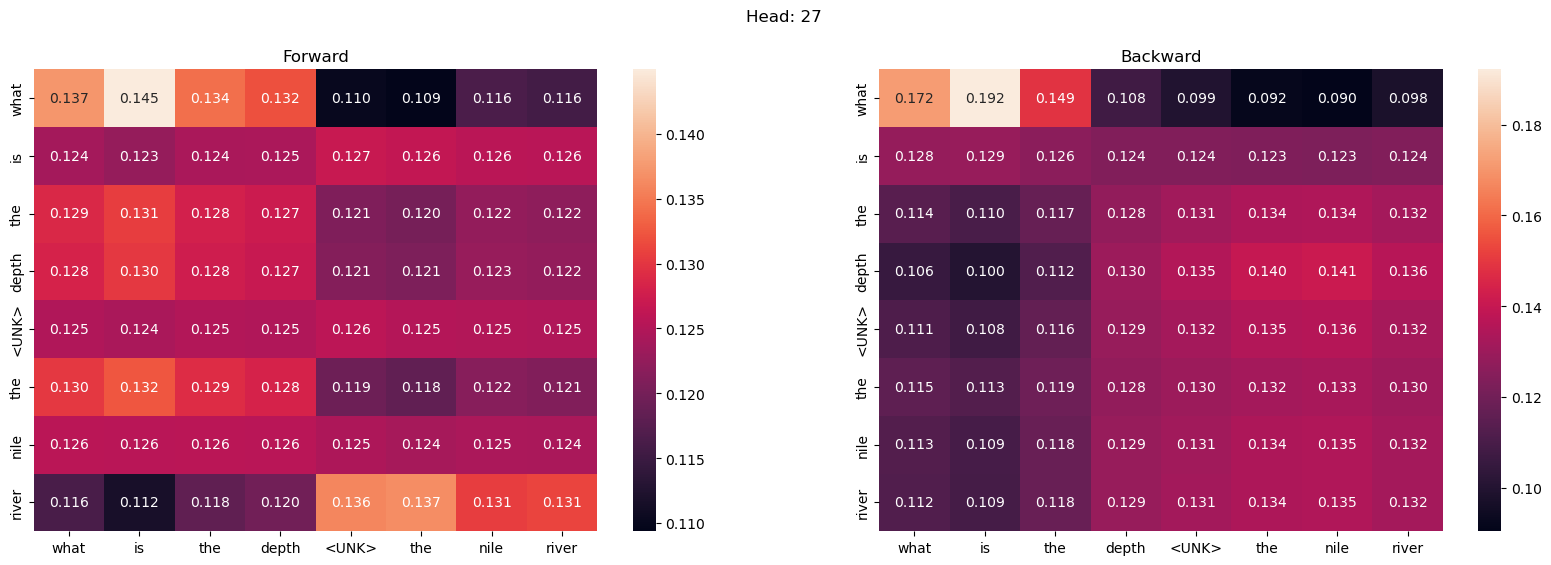

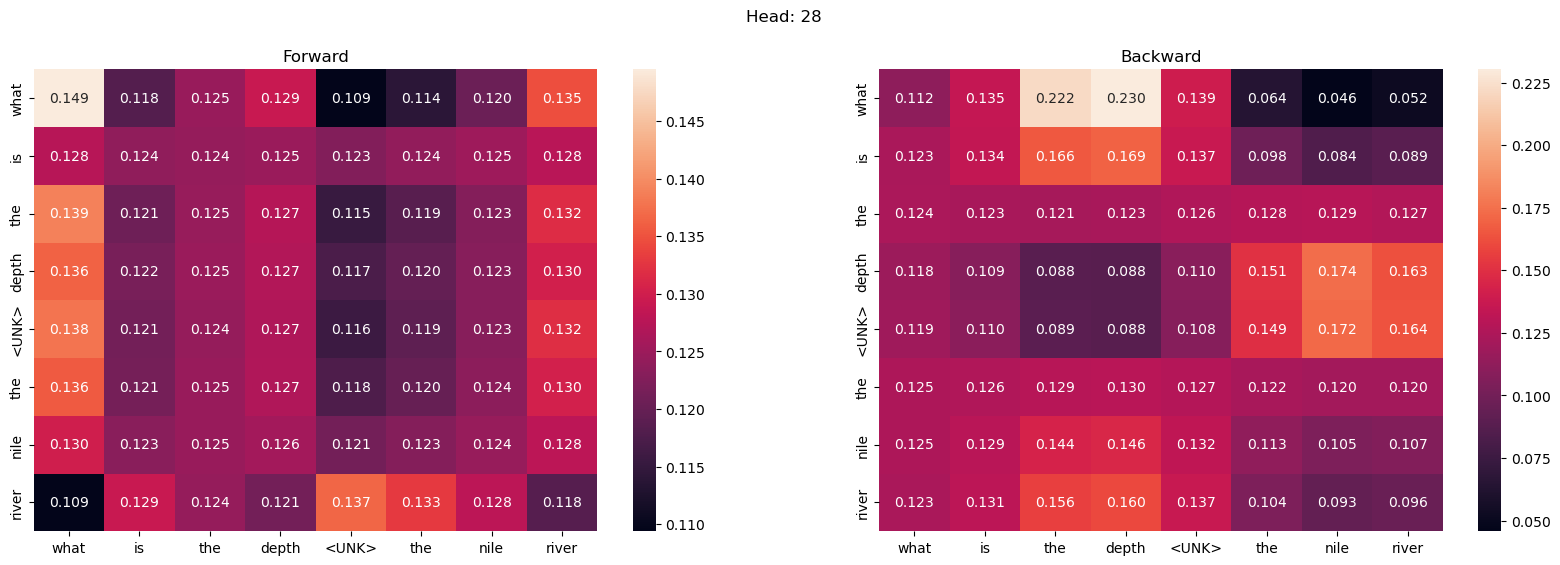

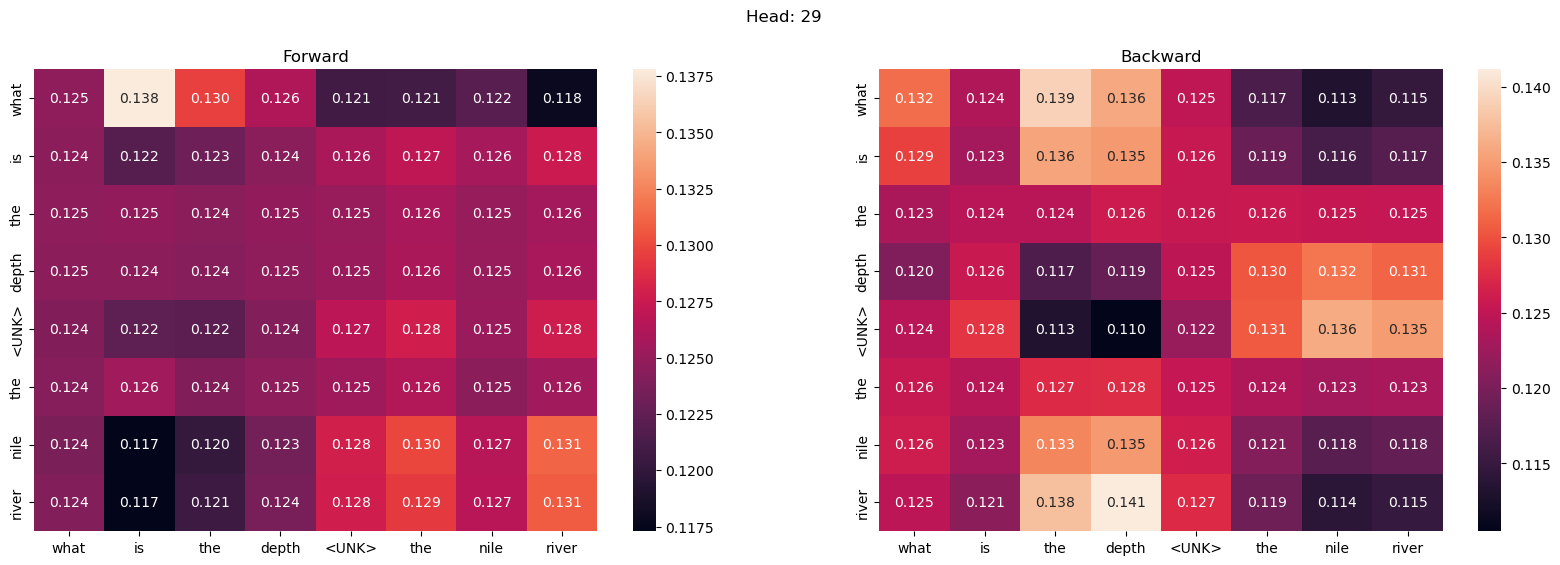

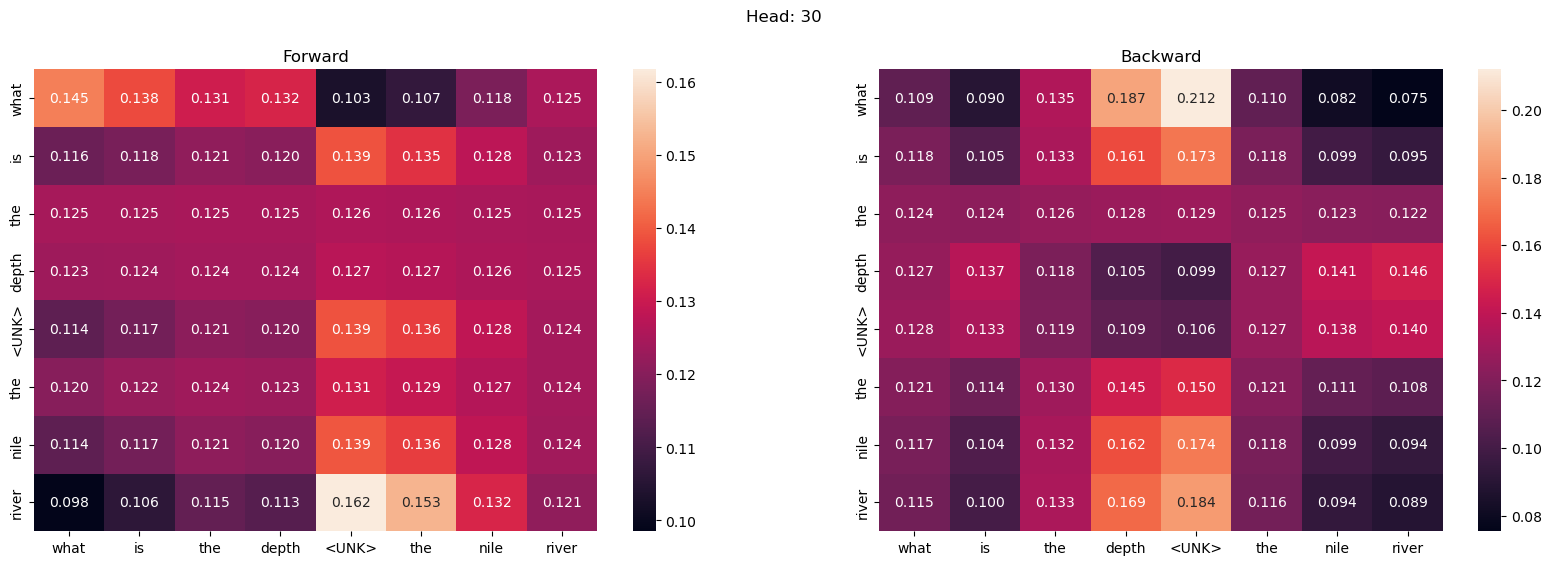

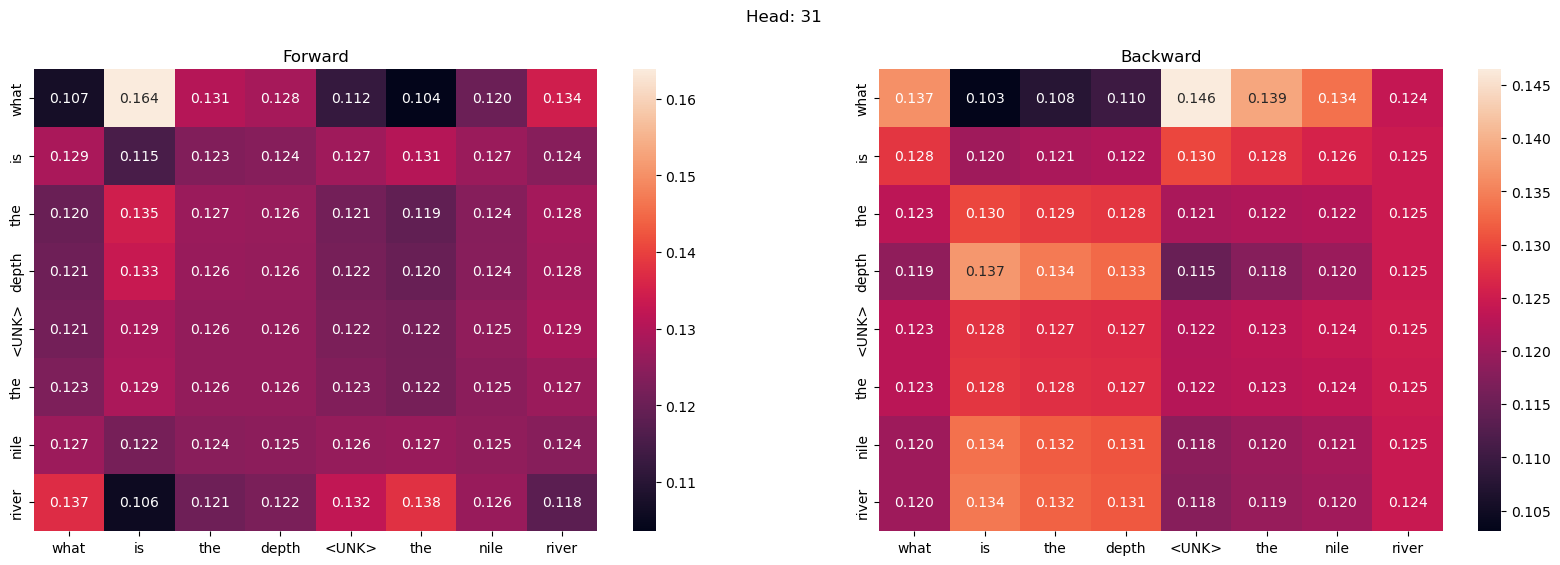

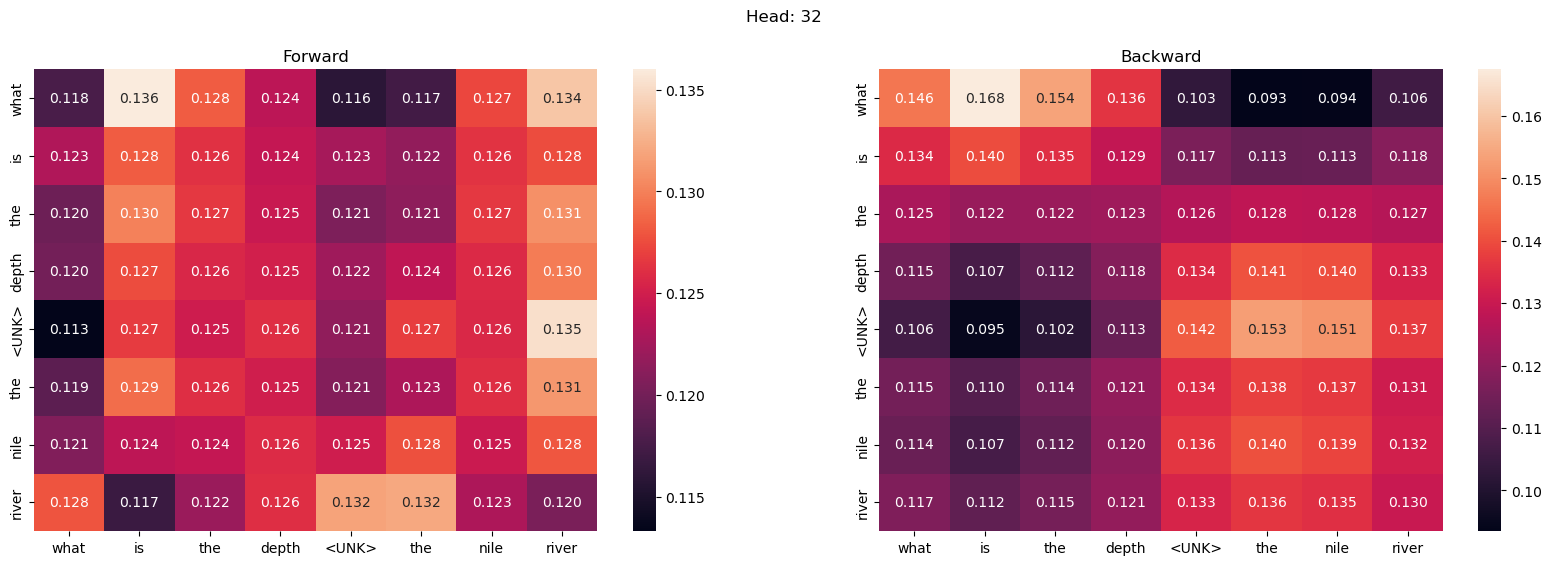

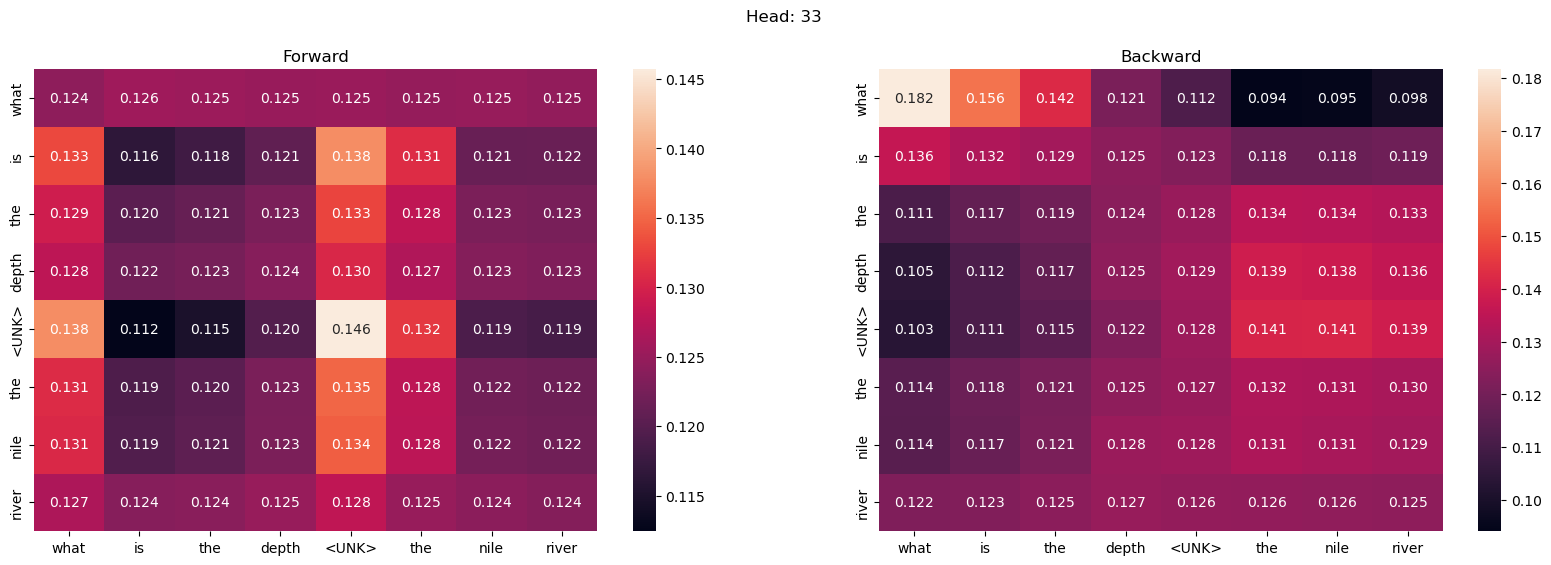

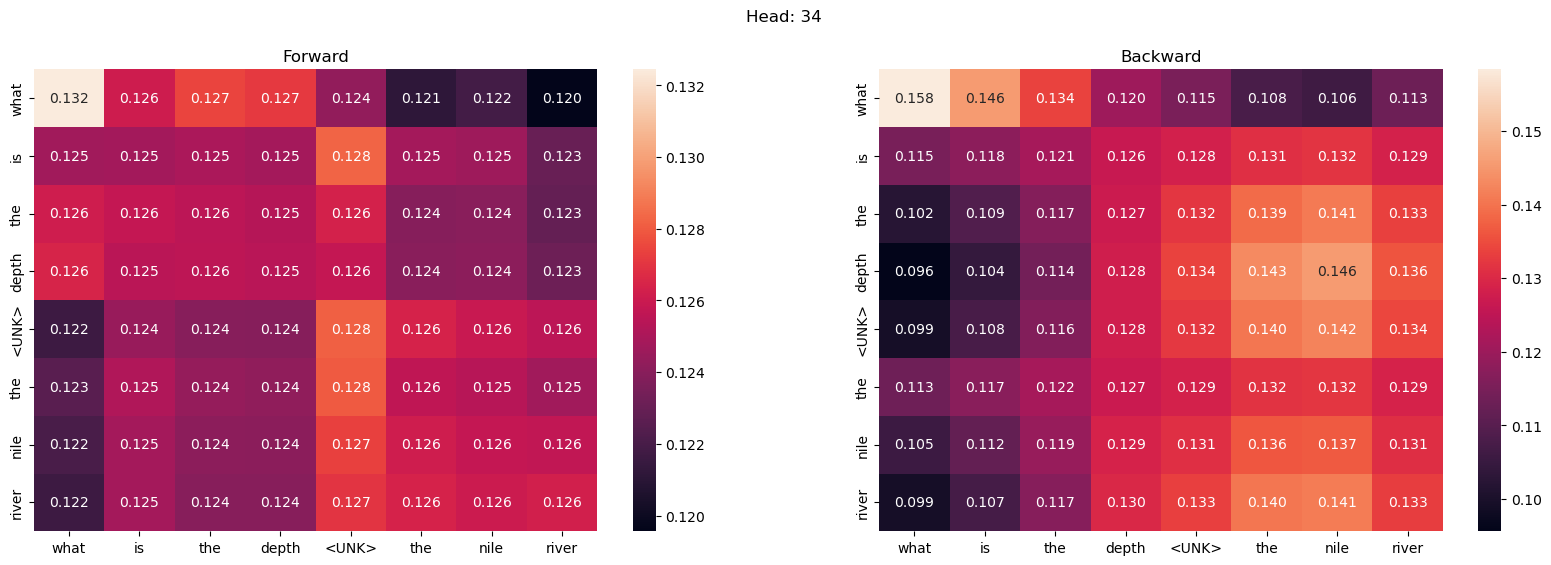

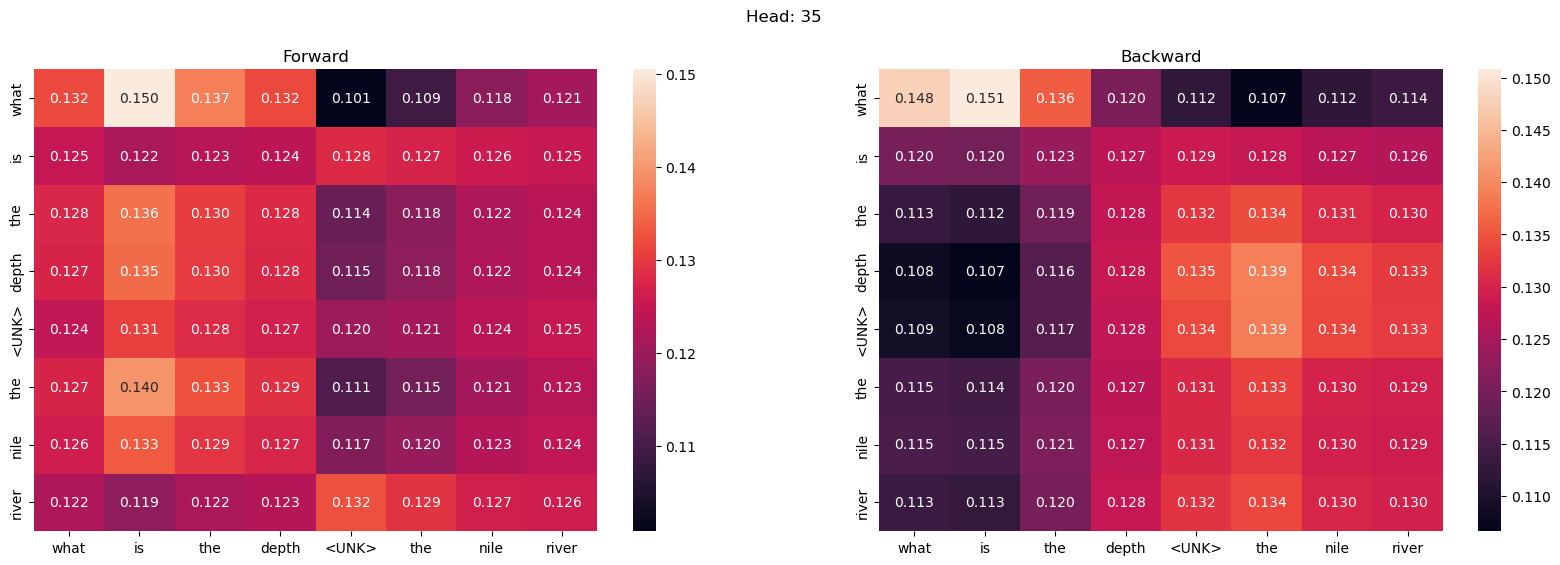

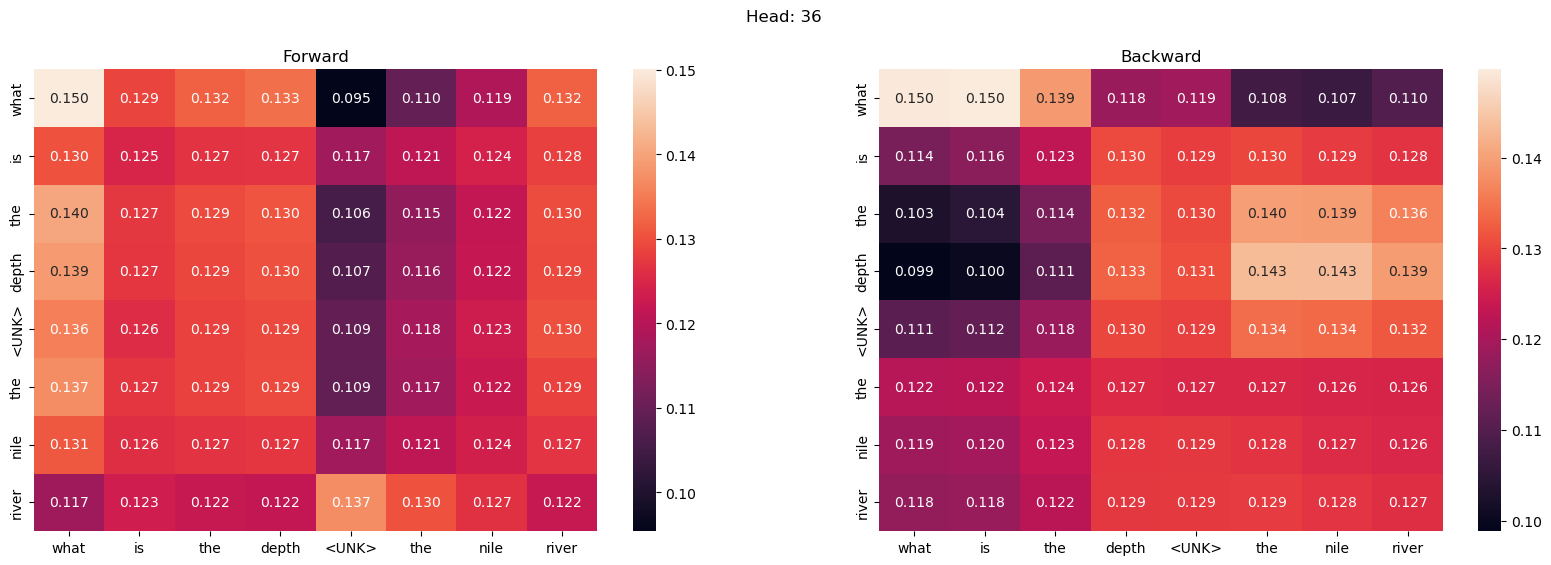

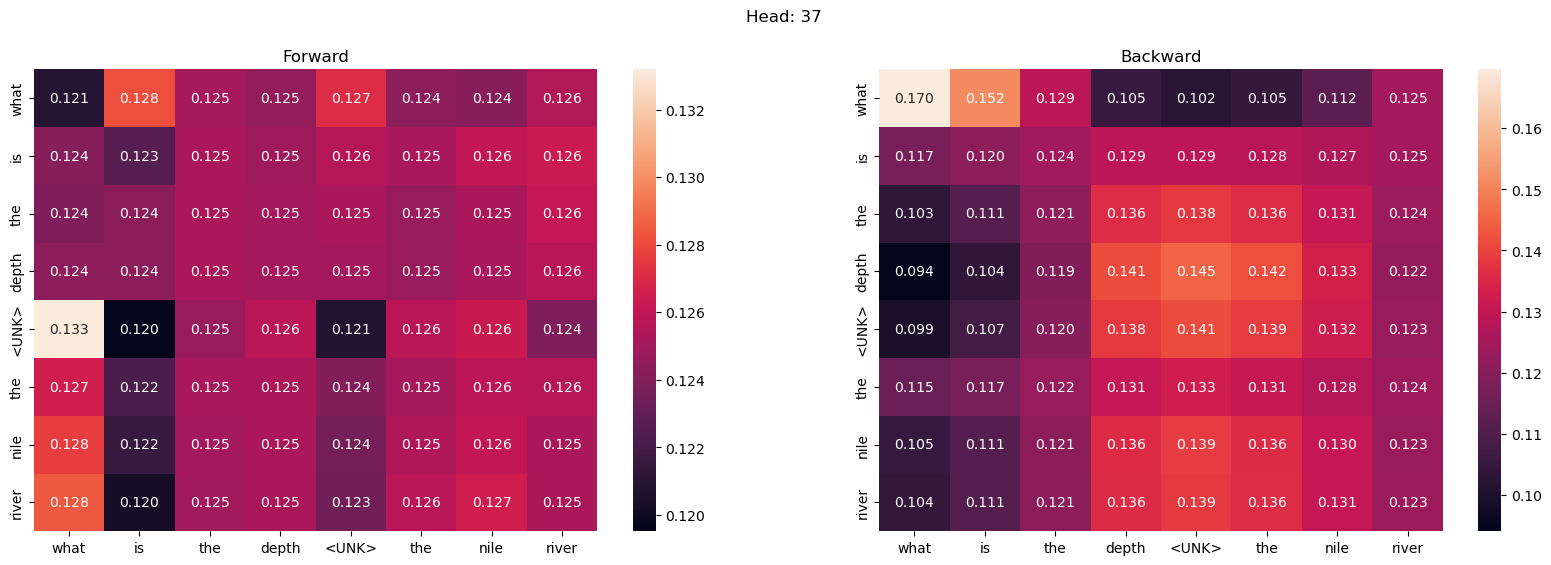

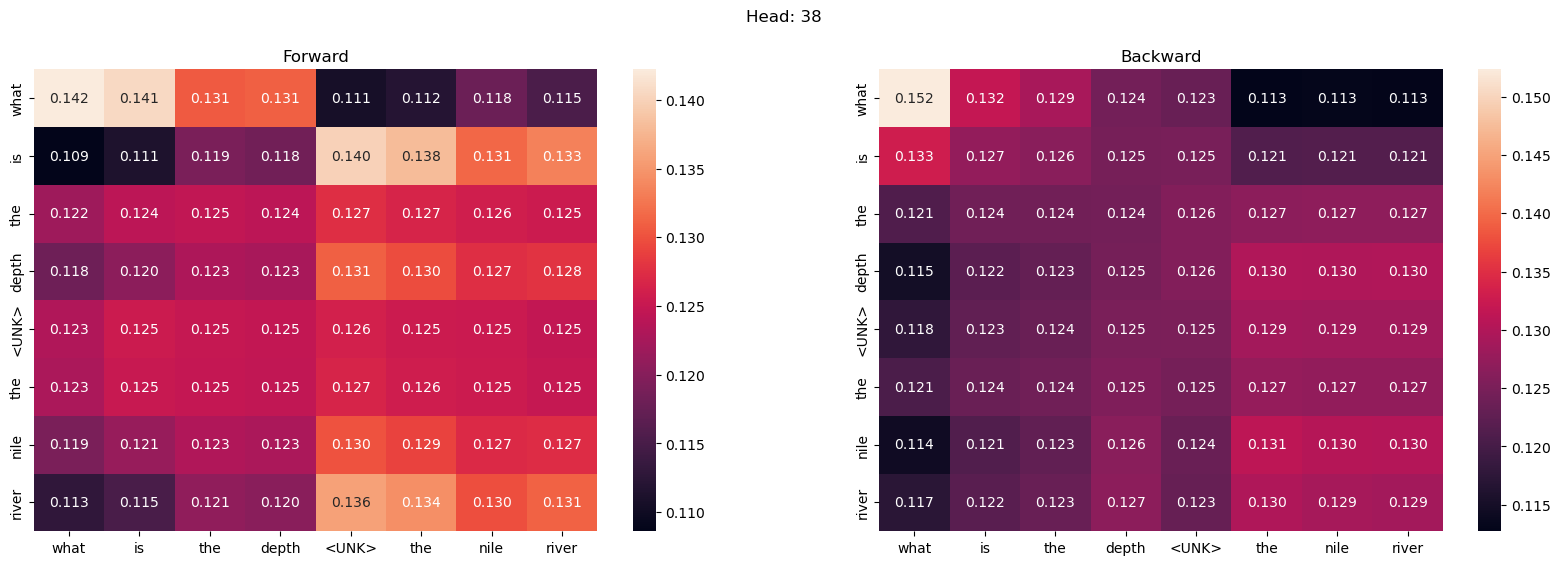

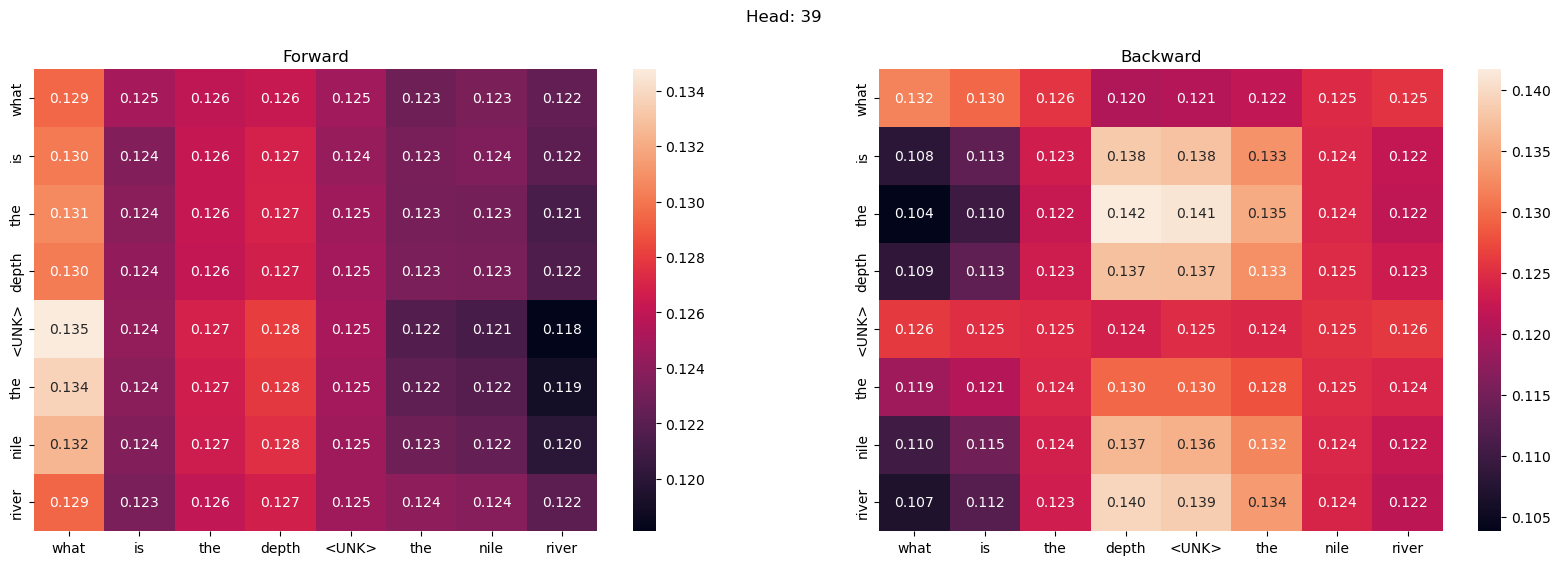

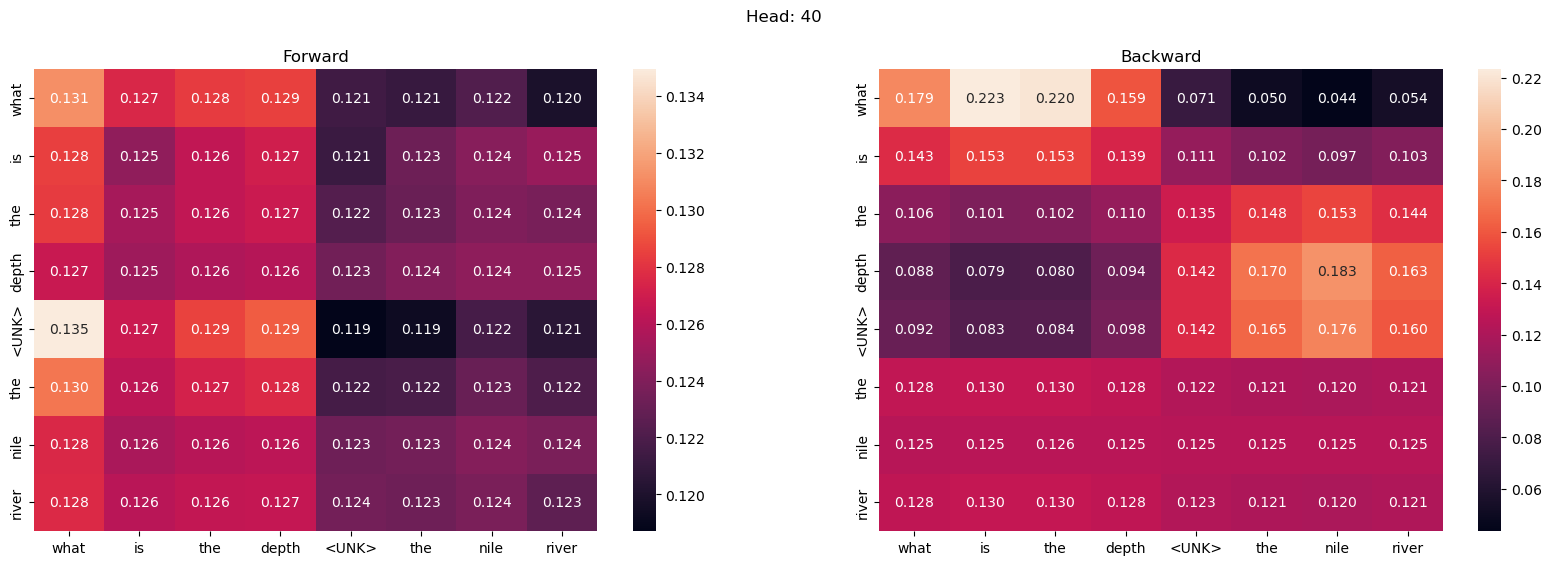

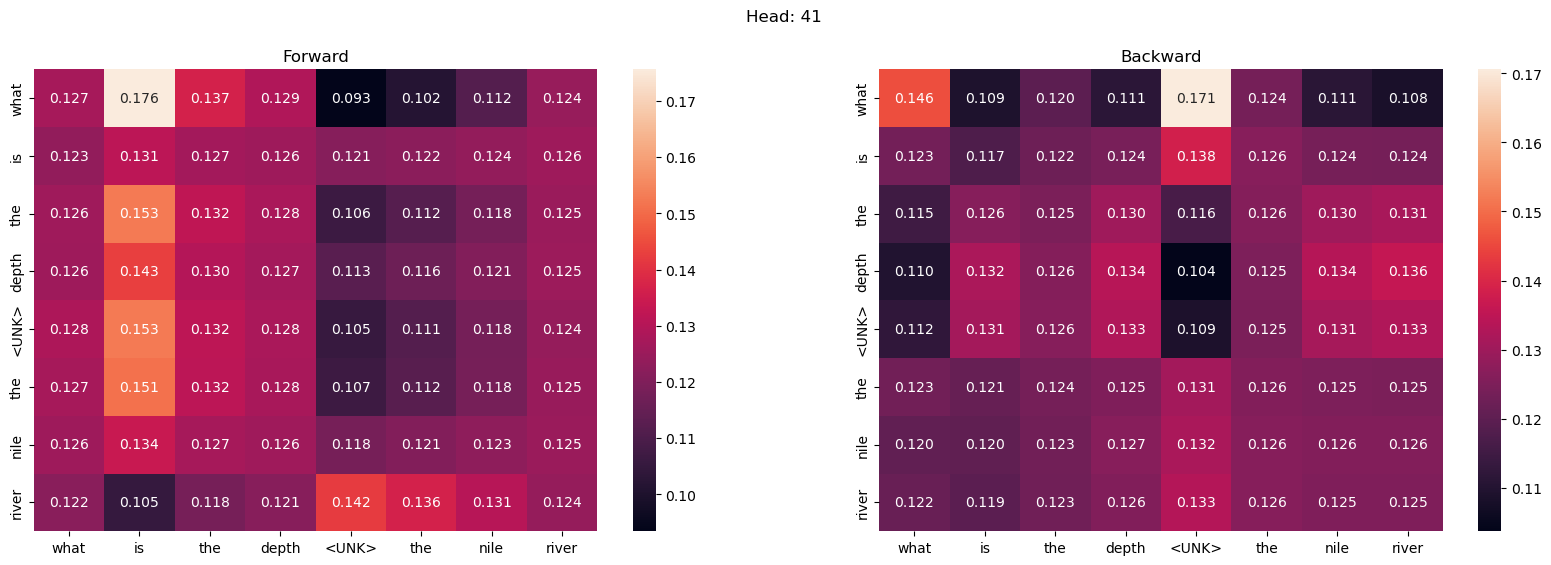

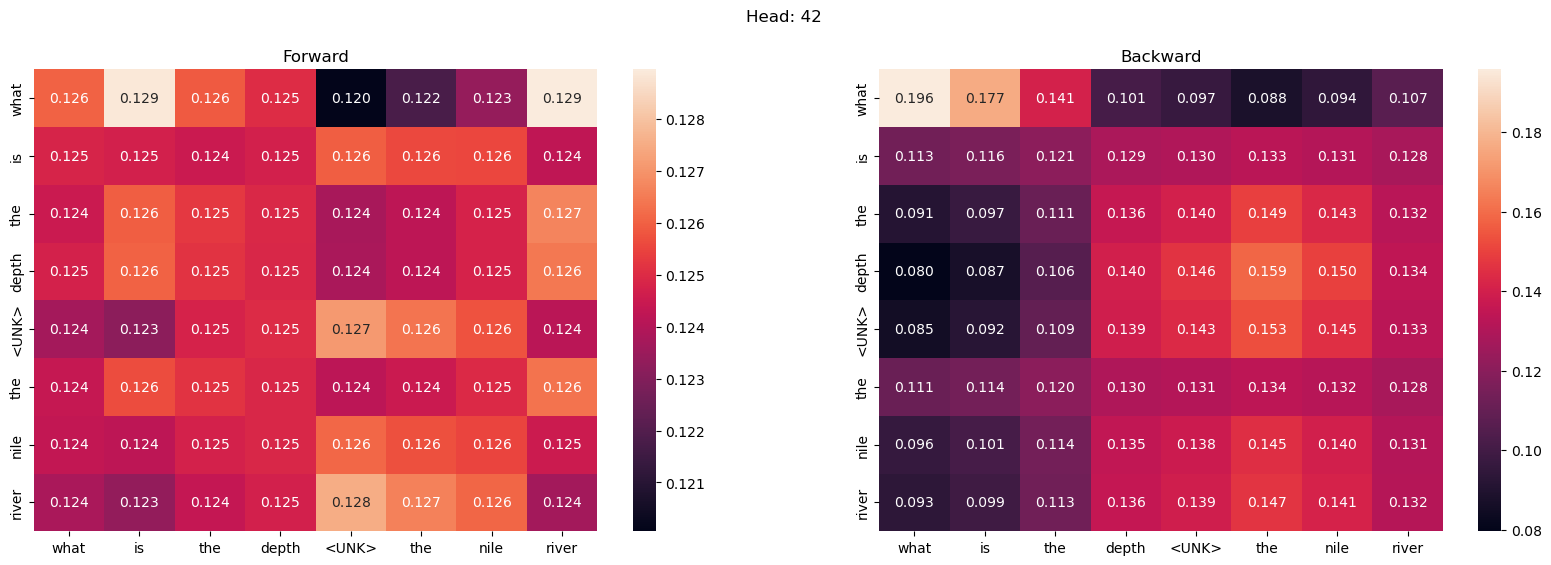

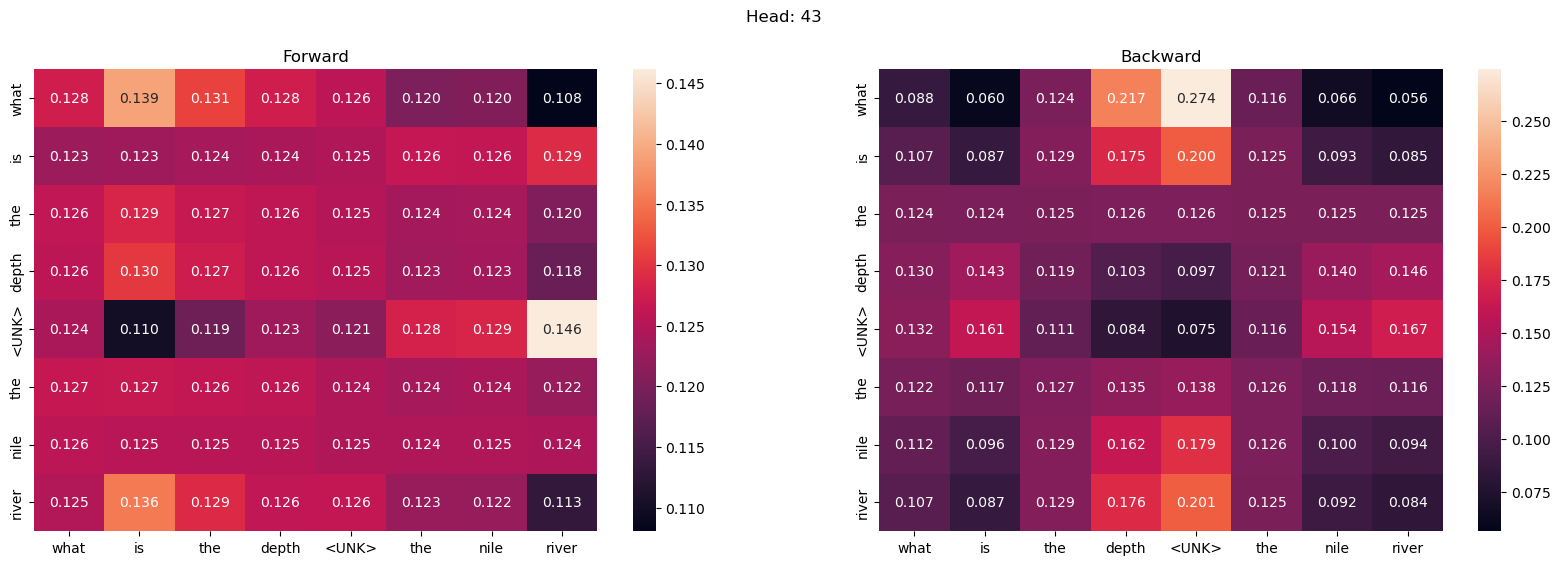

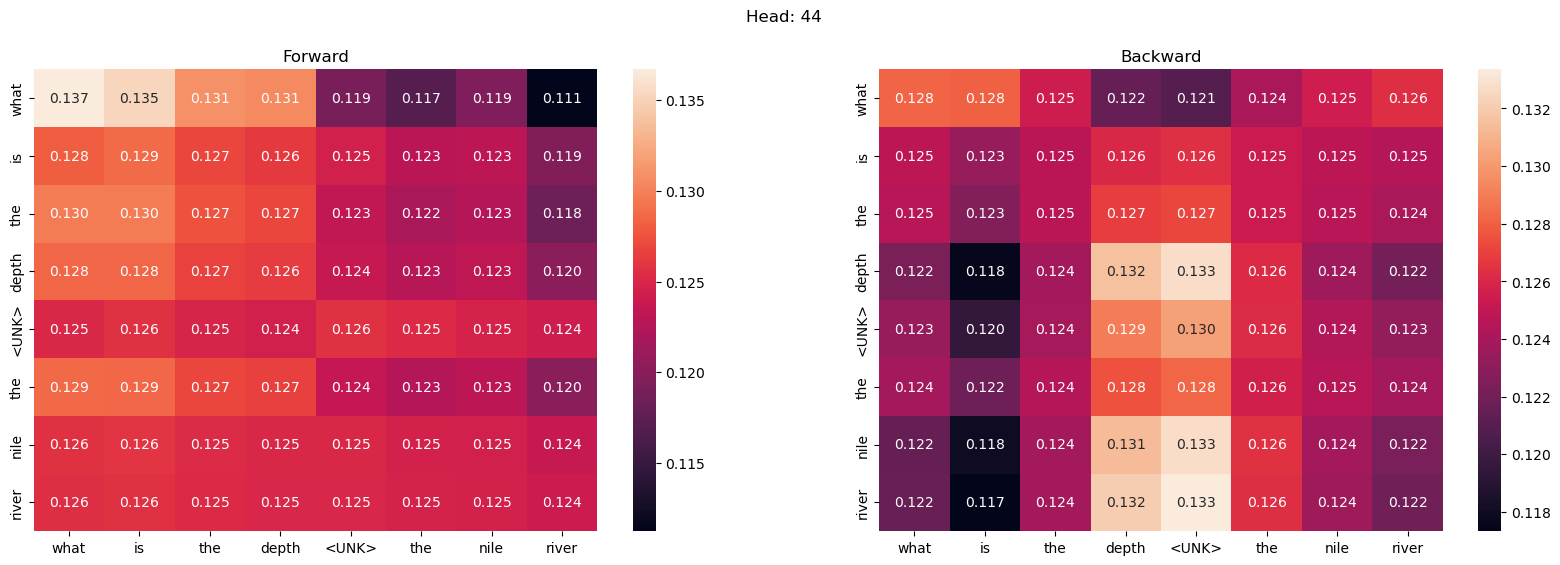

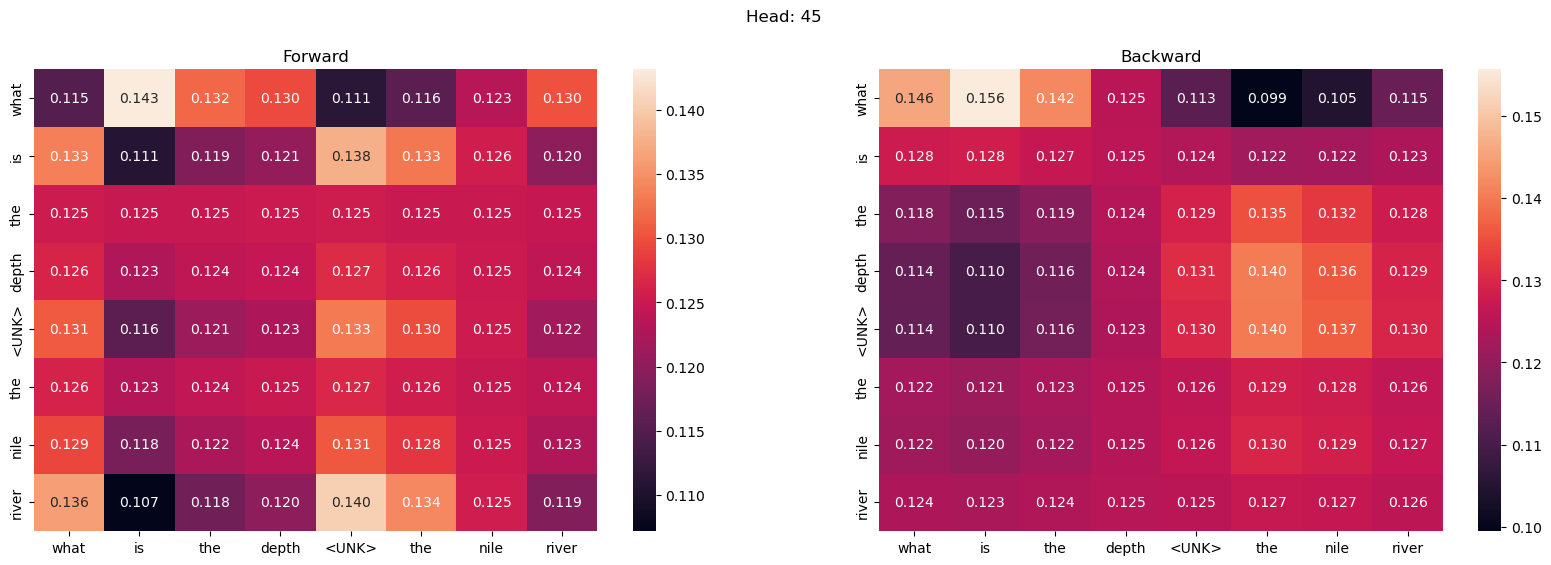

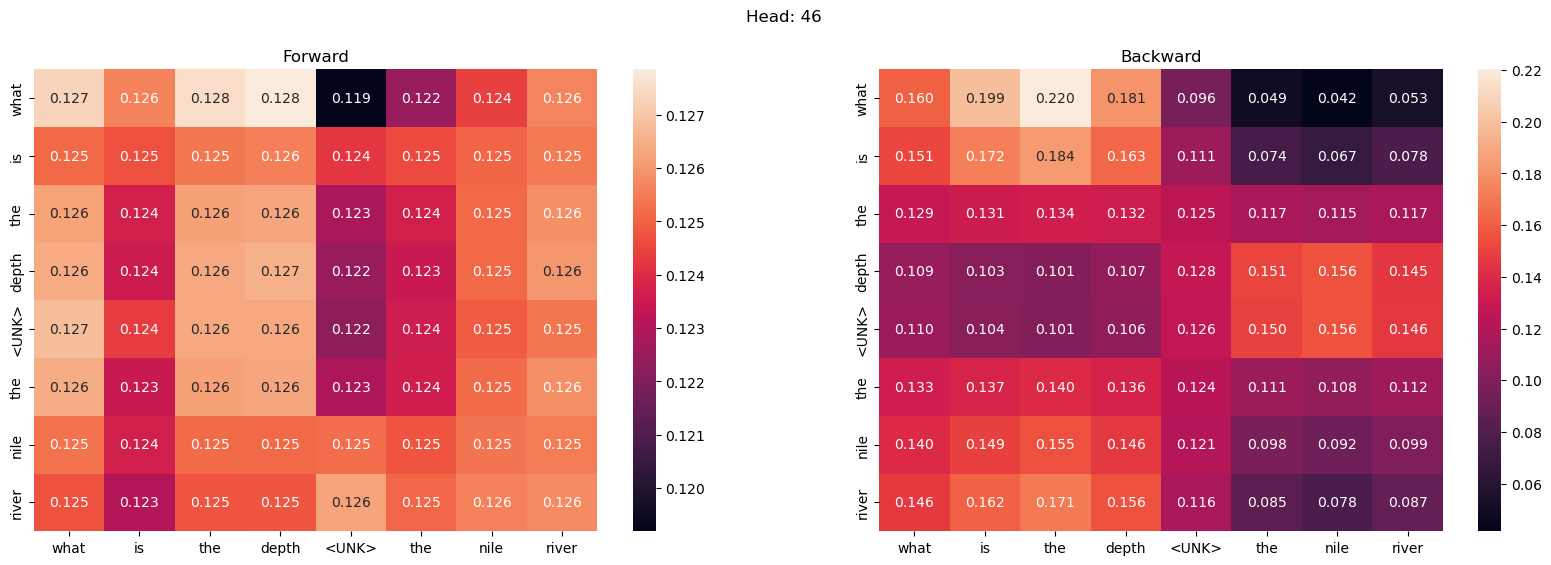

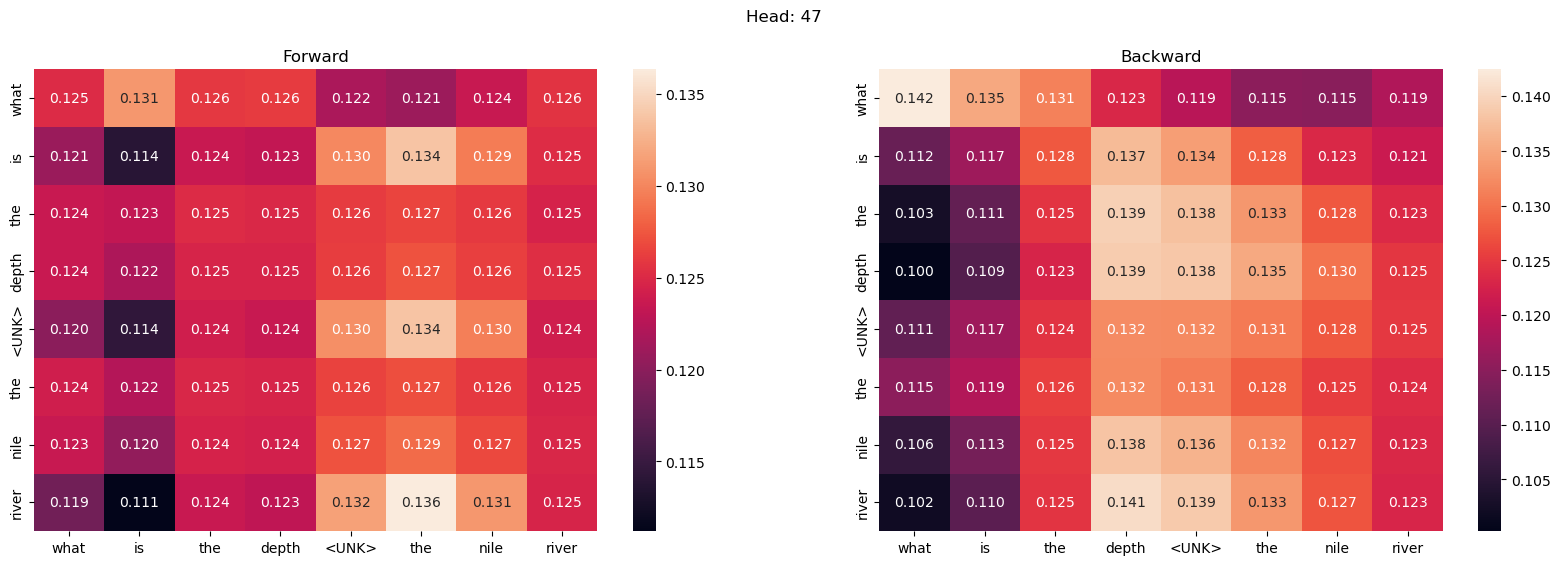

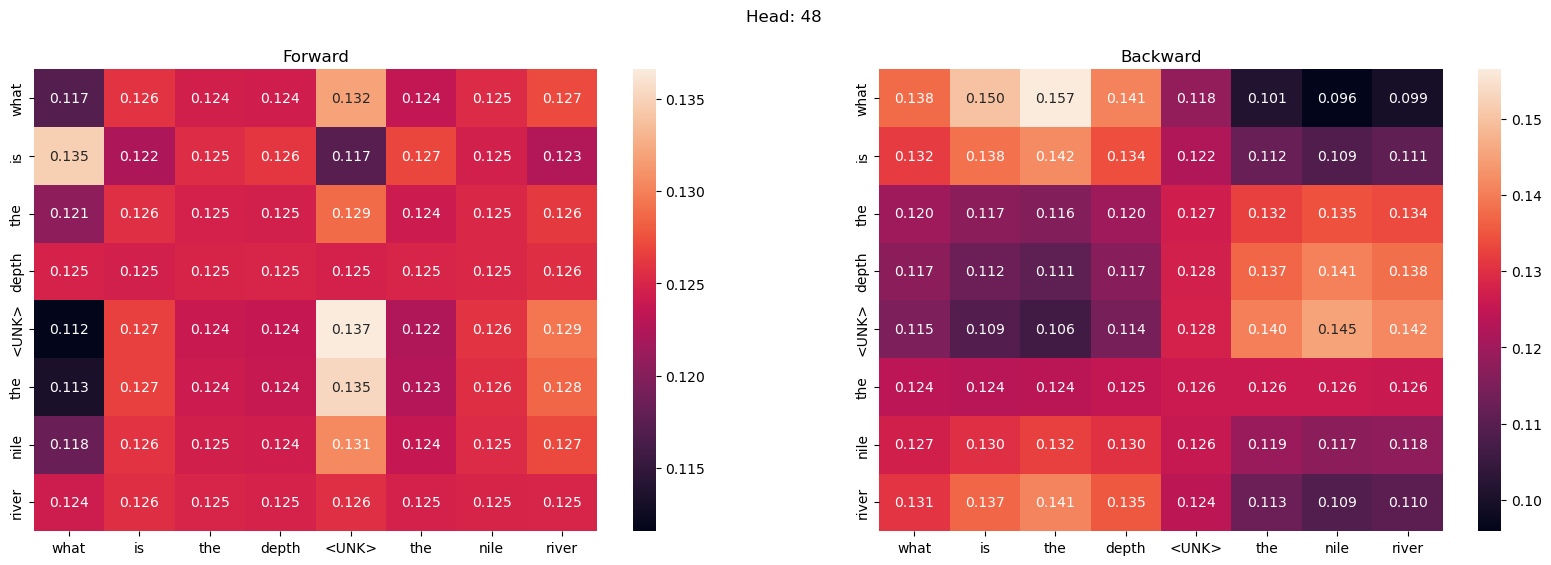

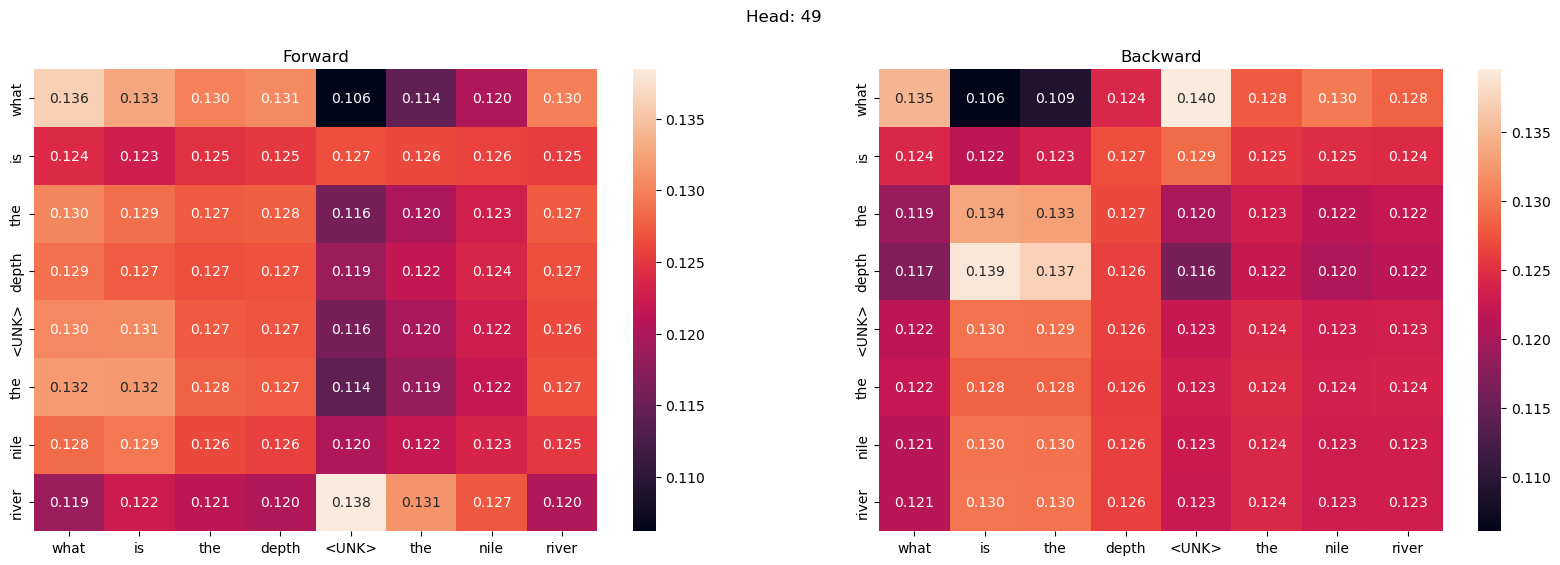

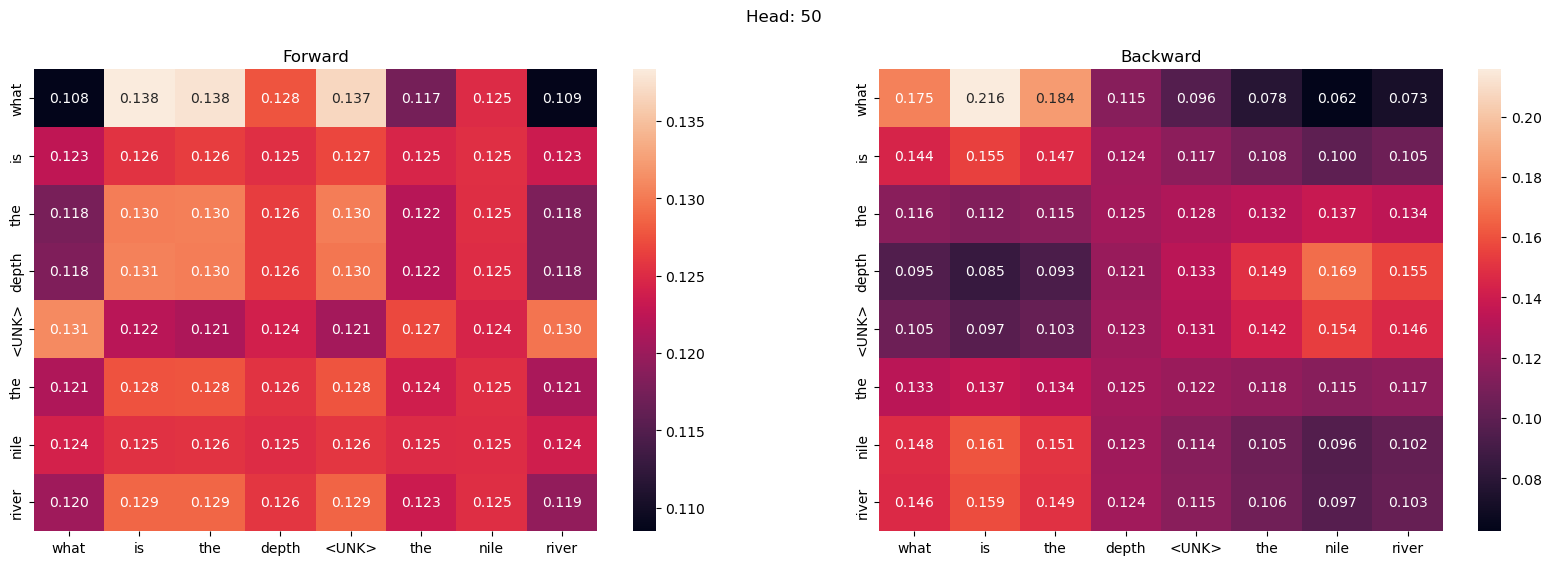

In [21]:
show_head_attention(model_50, df, df_row=df_row)